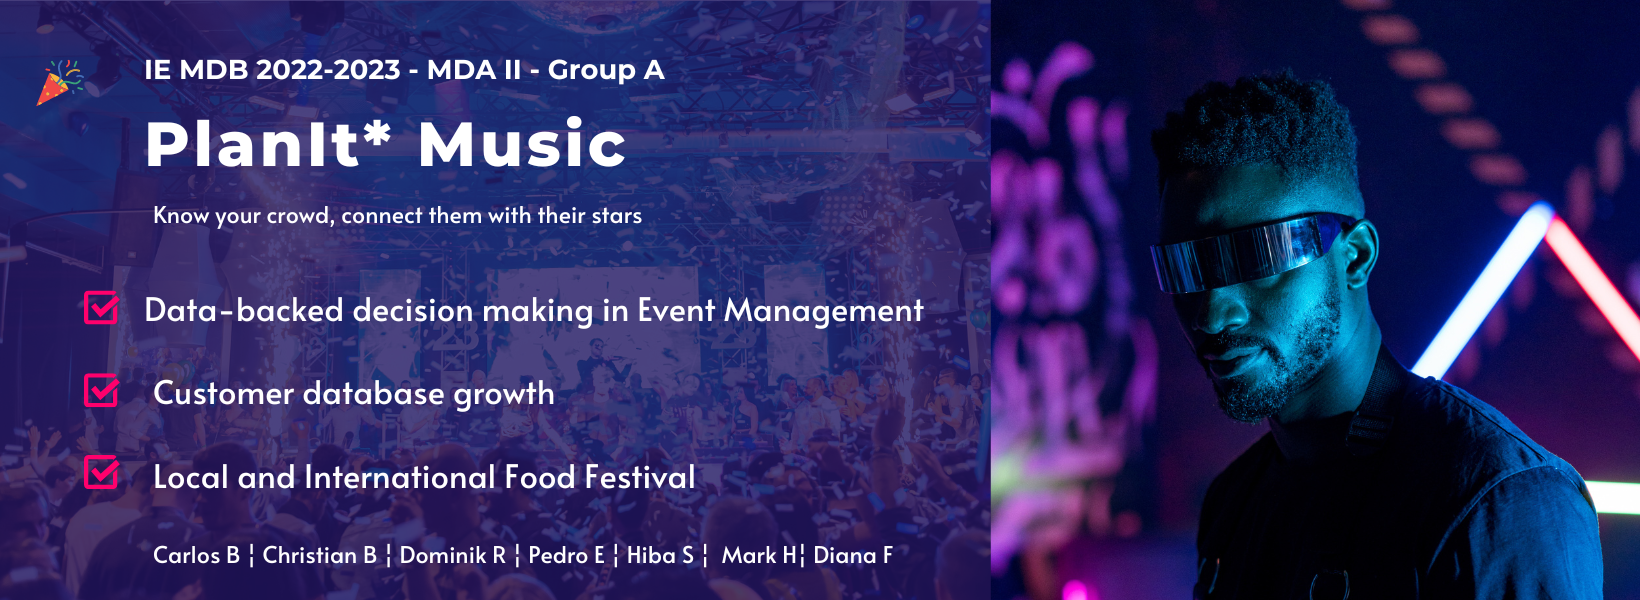

In [1]:
import findspark
findspark.init()

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [ ]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] =  '--jars /usr/share/java/mariadb-java-client.jar pyspark-shell'

In [3]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages "graphframes:graphframes:0.8.2-spark3.2-s_2.12" --jars /opt/hive3/lib/hive-hcatalog-core-3.1.2.jar pyspark-shell'

In [4]:
from pyspark.sql.session import SparkSession

spark = (SparkSession.builder
    .appName("Spotify_Twitter")
    .getOrCreate())

:: loading settings :: url = jar:file:/opt/spark3/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/osbdet/.ivy2/cache
The jars for the packages stored in: /home/osbdet/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-e1f328a9-e523-4b84-b38f-309e13d9542a;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 985ms :: artifacts dl 22ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	--------------------------------

# Load Spotify 5 Main Artists

In [5]:
main_artist_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("Main_Artist_DF.csv")            
            .distinct())

In [6]:
main_artist_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+
|              images|followers|popularity|        name|               genre|           artist_id|
+--------------------+---------+----------+------------+--------------------+--------------------+
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|
+--------------------+---------+----------+------------+--------------------+--------------------+



In [7]:
# Create a Main Artist Dict
main_artist_dict = {"OneRepublic":"5Pwc4xIPtQLFEnJriah9YJ", "Harry Styles":"6KImCVD70vtIoJWnq6nGn3", "The Weeknd":"1Xyo4u8uXC1ZmMpatF05PJ", "John Legend":"5y2Xq6xcjJb2jVM54GHK3t" ,"Bad Bunny":"4q3ewBCX7sLwd24euuV69X"}

# Load Spotify Top 10 Tracks  for 5 Main Artists Data

In [8]:
top_tracks_main_artist = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/artist_top_tracks")            
            .distinct())

In [9]:
top_tracks_main_artist.show()

+-----------+------------+--------------------+--------------------+---------------+--------------------+--------------------+
|duration_ms|release_date|          artists_id|                name|   artists_name|                  id|           artist_id|
+-----------+------------+--------------------+--------------------+---------------+--------------------+--------------------+
|     189373|  2022-07-29|07YUOmWljBTXwIseA...|       Tacones Rojos|Sebastian Yatra|4slJBQR5P1JjEH9HF...|5y2Xq6xcjJb2jVM54...|
|     200040|  2020-03-20|1Xyo4u8uXC1ZmMpat...|     Blinding Lights|     The Weeknd|0VjIjW4GlUZAMYd2v...|1Xyo4u8uXC1ZmMpat...|
|     196906|  2020-06-19|5y2Xq6xcjJb2jVM54...|Wild (feat. Gary ...|    John Legend|4rVW6XqAsSaf5vOwc...|5y2Xq6xcjJb2jVM54...|
|     207133|  2019-12-13|6KImCVD70vtIoJWnq...|           Adore You|   Harry Styles|3jjujdWJ72nww5eGn...|6KImCVD70vtIoJWnq...|
|     177954|  2022-05-20|6KImCVD70vtIoJWnq...|  Late Night Talking|   Harry Styles|1qEmFfgcLObUfQm0j...|6KImCV

# Load Spotify Top Charts Songs - 2022 

In [10]:
spotify_top_charts_22 = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/spotify_top_charts_22.csv")            
            .distinct())

In [11]:
spotify_top_charts_22.show()
spotify_top_charts_22.printSchema()

+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+
|                 uri|        artist_names|          track_name|peak_rank|weeks_on_chart|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|  tempo|time_signature|duration_ms|
+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+
|spotify:track:4zN...|James Hype, Miggy...|             Ferrari|       36|            10|       0.847|  0.69|  1|  -7.877|   0|     0.0493|      0.0127|          6.0E-5|  0.0526|125.004|             4|     186662|
|spotify:track:1E5...|          The Weeknd|        Best Friends|       26|             2|       0.737| 0.564|  4|  -7.045|   0|      0.105|     

# Load Spotify Related Artist Data for 5 Main Artist

In [12]:
related_artist_main_artist = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/related_artist")            
            .distinct())

In [13]:
related_artist_main_artist.show()

+--------------------+---------+----------+-------------------+-----------------+--------------------+--------------------+
|              images|followers|popularity|               name|            genre|                  id|           artist_id|
+--------------------+---------+----------+-------------------+-----------------+--------------------+--------------------+
|https://i.scdn.co...|   479538|        56|        Mat Kearney|     acoustic pop|2NQEwAVHBNcI0tGML...|5Pwc4xIPtQLFEnJri...|
|https://i.scdn.co...|  2159260|        56|             Tyrese| contemporary r&b|08p7B5OtcUuVblvkQ...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|   603702|        49|         Eric Benét| contemporary r&b|1kjO72M26jZkv0aaG...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|  1369846|        75|    Phoebe Bridgers|        indie pop|1r1uxoy19fzMxunt3...|6KImCVD70vtIoJWnq...|
|https://i.scdn.co...|  7529029|        73|         The Script|      celtic rock|3AQRLZ9PuTAozP28S...|5Pwc4xIPtQLFEnJri...|
|https:/

# Load Twitter Data for 5 Main Artist

In [14]:
one_republic_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/one_republic.json")            
            .distinct())

In [15]:
harry_styles_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/harry_styles.json")            
            .distinct())

In [16]:
john_legend_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/john_legend.json")            
            .distinct())

In [17]:
bad_bunny_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/bad_bunny.json")            
            .distinct())

In [18]:
the_weekend_tweet_df  = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/the_weekend.json")            
            .distinct())

# Load All Artist Consolidate Tweet for Month per Day

In [19]:
consolidated_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("twitter/consolidated_artists_tweets_count.csv")            
            .distinct())

# Load Main Artist Consolidate Tweet for Month per Day

In [20]:
from pyspark.sql.functions import *
consolidated_tweet_df.show()

+-------------------+-------------------+-----------+------------+--------------------+
|                end|              start|tweet_count|        name|           artist_id|
+-------------------+-------------------+-----------+------------+--------------------+
|2022-09-07 02:00:00|2022-09-06 02:00:00|       5056|      J.Cole|6l3HvQ5sa6mXTsMTB...|
|2022-09-02 02:00:00|2022-09-01 02:00:00|      24428|      J.Cole|6l3HvQ5sa6mXTsMTB...|
|2022-09-29 02:00:00|2022-09-28 02:00:00|       3226|Harry Styles|6KImCVD70vtIoJWnq...|
|2022-09-06 02:00:00|2022-09-05 02:00:00|        751|One Republic|10Pwc4xIPtQLFEnJr...|
|2022-09-14 02:00:00|2022-09-13 02:00:00|        921|One Republic|18Pwc4xIPtQLFEnJr...|
|2022-09-28 02:00:00|2022-09-27 02:00:00|        404|       6LACK|4IVAbR2w4JJNJDDRF...|
|2022-09-07 02:00:00|2022-09-06 02:00:00|       2266|   Bad Bunny|10q3ewBCX7sLwd24e...|
|2022-09-24 02:00:00|2022-09-23 02:00:00|         11|Majid Jordan|27HzKw8XcD0piJmDr...|
|2022-09-13 02:00:00|2022-09-12 

# 5 Main Artist Tweet Count for Month

In [21]:
from pyspark.sql.functions import when, lit, col, create_map

main_artist_tweet_count_df = main_artist_df.withColumn("tweets_last_month",
              when((main_artist_df.name  == "OneRepublic"), one_republic_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "Harry Styles"), harry_styles_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "John Legend"), john_legend_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "Bad Bunny"), bad_bunny_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "The Weeknd"), the_weekend_tweet_df.select(sum("tweet_count")).first()[0]))

main_artist_tweet_count_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|              images|followers|popularity|        name|               genre|           artist_id|tweets_last_month|
+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|            48225|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|           169904|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|            20792|
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|           195074|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|            57322|
+--------------------+---------+----------+------------+--------

# Business Questions - I

### A. What ranking these 5 Featured artists are based on number of songs on top charts, and how many songs our feature artist has had in the top charts in 2022?

### B. On average, for how many weeks each featured artist has been on the top charts?

In [22]:
top_5_artist_list = ["OneRepublic", "Harry Styles", "The Weeknd", "John Legend", "Bad Bunny"]

# save top chart songs for 5 main artist including song with featured artist
spotify_top_charts_22_main_artist = spotify_top_charts_22.filter(col("artist_names").contains("OneRepublic") |
                                                       col("artist_names").contains("Harry Styles") |
                                                       col("artist_names").contains("The Weeknd") |
                                                       col("artist_names").contains("John Legend") |
                                                       col("artist_names").contains("Bad Bunny")
                                                      ) 

spotify_top_charts_22_main_artist_ = spotify_top_charts_22_main_artist.withColumn("main_artist",
              when((spotify_top_charts_22_main_artist.artist_names.contains("OneRepublic")), lit("OneRepublic")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("Harry Styles")), lit("Harry Styles")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("The Weeknd")), lit("The Weeknd")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("John Legend")), lit("John Legend")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("Bad Bunny")), lit("Bad Bunny"))
             )

# A. Total Song in Top Charts for 5 Main Artist
# B. On average, for how many weeks each featured artist has been on the top charts?

spotify_top_charts_22_main_artist_.groupBy("main_artist")\
    .agg(count("*").alias("Total Song on Top Chart"), avg("weeks_on_chart").alias("Average Week on Top Charts"))\
.withColumnRenamed("main_artist","Artist").show(truncate=False)

+------------+-----------------------+--------------------------+
|Artist      |Total Song on Top Chart|Average Week on Top Charts|
+------------+-----------------------+--------------------------+
|Bad Bunny   |35                     |20.285714285714285        |
|OneRepublic |2                      |32.0                      |
|Harry Styles|18                     |25.22222222222222         |
|John Legend |1                      |145.0                     |
|The Weeknd  |32                     |21.15625                  |
+------------+-----------------------+--------------------------+



### C. Do they appear on the top charts as single artist or in collaborations (together with another artists)

In [23]:
# Populate if the artist has collaborated with another artist in the chart
spotify_top_charts_22_main_artist_collaboration = spotify_top_charts_22_main_artist_.withColumn("collaboration",
              when((spotify_top_charts_22_main_artist.artist_names.startswith("OneRepublic") & spotify_top_charts_22_main_artist.artist_names.endswith("OneRepublic")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("Harry Styles") & spotify_top_charts_22_main_artist.artist_names.endswith("Harry Styles")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("The Weeknd") & spotify_top_charts_22_main_artist.artist_names.endswith("The Weeknd")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("John Legend") & spotify_top_charts_22_main_artist.artist_names.endswith("John Legend")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("Bad Bunny") & spotify_top_charts_22_main_artist.artist_names.endswith("Bad Bunny")), False)
              .otherwise(True)) 

spotify_top_charts_22_main_artist_collaboration.show()
# Group Solo Artist song and their collaboration song and find sum of the week on charts

collboration_grouped_df = spotify_top_charts_22_main_artist_collaboration.groupBy(["main_artist","collaboration"])\
    .agg(count("*").alias("total_song"), sum("weeks_on_chart").alias("sum_week_on_charts"))

collboration_grouped_df.show()

+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+------------+-------------+
|                 uri|        artist_names|          track_name|peak_rank|weeks_on_chart|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|  tempo|time_signature|duration_ms| main_artist|collaboration|
+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+------------+-------------+
|spotify:track:1E5...|          The Weeknd|        Best Friends|       26|             2|       0.737| 0.564|  4|  -7.045|   0|      0.105|       0.436|             0.0|   0.351|   90.0|             4|     163504|  The Weeknd|        false|
|spotify:track:759...|          The 

### Analytical - Window Function to return the if the maximum of sum of week on charts as by single or in collaboration with featuring artist

In [24]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number

windowDept = Window.partitionBy("main_artist").orderBy(col("sum_week_on_charts").desc())
collboration_grouped_df.withColumn("row",row_number().over(windowDept)) \
  .filter(col("row") == 1).drop("row").show()

+------------+-------------+----------+------------------+
| main_artist|collaboration|total_song|sum_week_on_charts|
+------------+-------------+----------+------------------+
|   Bad Bunny|         true|        16|               471|
|Harry Styles|        false|        18|               454|
| John Legend|        false|         1|               145|
| OneRepublic|        false|         2|                64|
|  The Weeknd|        false|        20|               359|
+------------+-------------+----------+------------------+



# Business Questions - II

### A. Is popularity rank in Spotify aligned to the total amount of tweets we have observed during the last month?

In [25]:
# Sort the popularity of tweets for the artist
main_artist_tweet_count_df = main_artist_tweet_count_df.sort("popularity")
main_artist_tweet_count_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|              images|followers|popularity|        name|               genre|           artist_id|tweets_last_month|
+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|           195074|
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|            48225|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|           169904|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|            20792|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|            57322|
+--------------------+---------+----------+------------+--------

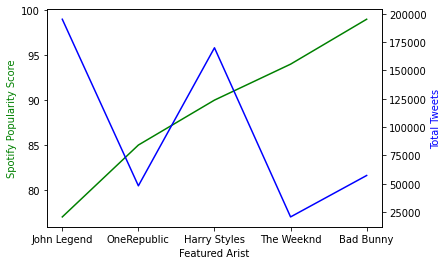

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark Dataframe to Pandas() dataframe
main_artist_tweet_count_df = main_artist_tweet_count_df.toPandas()

x = main_artist_tweet_count_df['name']
y1 = main_artist_tweet_count_df['popularity']
y2 = main_artist_tweet_count_df['tweets_last_month']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Spotify Popularity Score', color = 'g')
ax2.set_ylabel('Total Tweets', color = 'b')

plt.show()

### B. Has any of the features artist increase/decreased popularity in the last month?

In [27]:
import numpy as np
def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    if float(slope) == 0:
        return "Neutral"
    return "Increasing" if float(slope) > 0 else "Decreasing"

total_tweet = one_republic_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = one_republic_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for OneRepublic is : {trendline(index,sequence)}") 

total_tweet = harry_styles_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = harry_styles_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for Harry Styles is : {trendline(index,sequence)}") 

total_tweet = john_legend_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = john_legend_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for John Legend is : {trendline(index,sequence)}") 

total_tweet = bad_bunny_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = bad_bunny_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for Bad Bunny is : {trendline(index,sequence)}") 

total_tweet = the_weekend_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = the_weekend_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for The Weeknd is : {trendline(index,sequence)}") 

Twitter Trend for OneRepublic is : Increasing
Twitter Trend for Harry Styles is : Increasing
Twitter Trend for John Legend is : Increasing
Twitter Trend for Bad Bunny is : Decreasing
Twitter Trend for The Weeknd is : Decreasing


#### Reference : https://stackoverflow.com/questions/55649356/how-can-i-detect-if-trend-is-increasing-or-decreasing-in-time-series

# Business Questions - III

### A. What is the popularity of the related artists according to the degree of popularity and number of followers? 

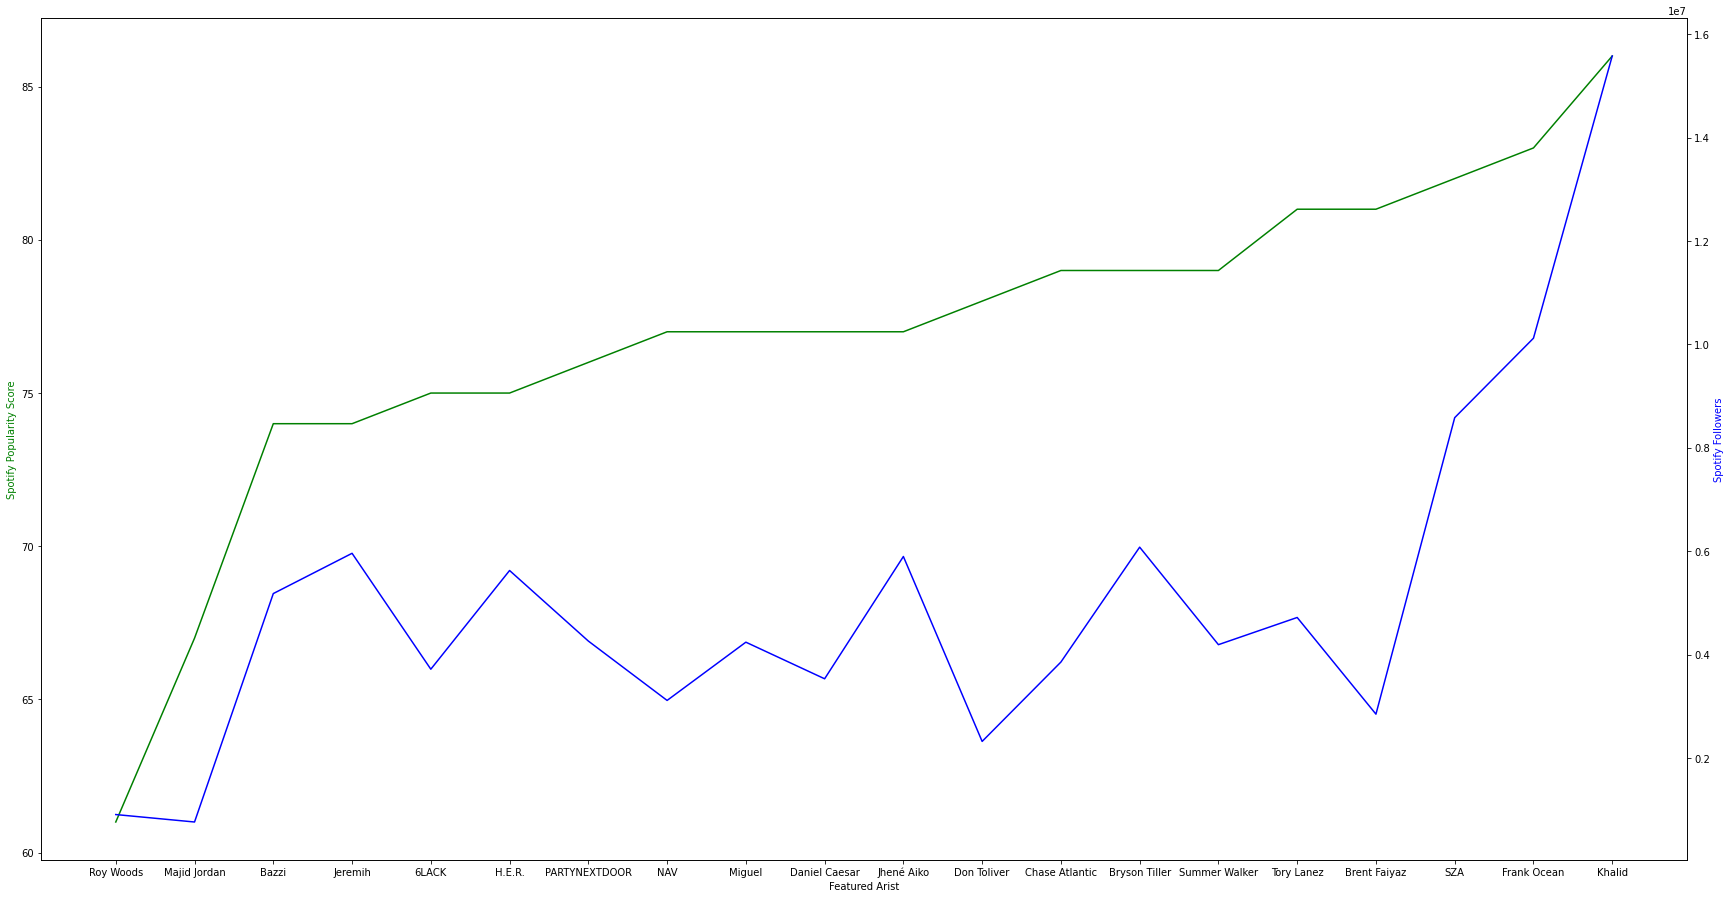

In [28]:
the_weekend_related_artist = related_artist_main_artist.filter(related_artist_main_artist["artist_id"] == '1Xyo4u8uXC1ZmMpatF05PJ')
popularity_meter = the_weekend_related_artist.sort("popularity")
popularity_meter = popularity_meter.toPandas()


x = popularity_meter['name']
y1 = popularity_meter['popularity']
y2 = popularity_meter['followers']

fig, ax1 = plt.subplots()
fig.set_size_inches(29.5, 15.5)


ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Spotify Popularity Score', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()


### B. What is the popularity of the related artists according to the count of tweets of the last month?
Considering only 'The Weeknd' | Artist Id - 1Xyo4u8uXC1ZmMpatF05PJ

In [29]:
list_of_related_artist = list(the_weekend_related_artist.select("name").toPandas().values.reshape(-1))
print(list_of_related_artist)

['6LACK', 'Khalid', 'Chase Atlantic', 'NAV', 'Don Toliver', 'Majid Jordan', 'Bryson Tiller', 'Bazzi', 'Tory Lanez', 'H.E.R.', 'Summer Walker', 'Brent Faiyaz', 'SZA', 'Miguel', 'Daniel Caesar', 'Jhené Aiko', 'PARTYNEXTDOOR', 'Roy Woods', 'Frank Ocean', 'Jeremih']


### Find Twitter Trend for Related Artist for 'The Weeknd'

In [30]:
related_consolidated_tweet_df = consolidated_tweet_df.filter(consolidated_tweet_df.name.isin(list_of_related_artist))
related_artist_sum_tweets_df = related_consolidated_tweet_df.groupBy("name")\
    .agg(sum("tweet_count").alias("total_tweet"))
related_artist_sum_tweets_df.show()

+-------------+-----------+
|         name|total_tweet|
+-------------+-----------+
|Bryson Tiller|       8696|
|PARTYNEXTDOOR|      31552|
|        6LACK|      22678|
| Majid Jordan|        384|
| Brent Faiyaz|      79037|
+-------------+-----------+



In [31]:
matched_list_of_related_artist = list(related_consolidated_tweet_df.dropDuplicates(["name"]).select("name").toPandas().values.reshape(-1))
print(matched_list_of_related_artist)

['Bryson Tiller', 'PARTYNEXTDOOR', '6LACK', 'Majid Jordan', 'Brent Faiyaz']


In [32]:
from collections import defaultdict
related_artist_twitter_trend = defaultdict(int)

for artist in matched_list_of_related_artist:
    df = related_consolidated_tweet_df.filter(related_consolidated_tweet_df.name == artist).sort("start")
    total_tweet = df.count()
    index = list(range(1, total_tweet+1))
    sequence = df.select("tweet_count").toPandas().values.reshape(-1)
    result = trendline(index,sequence)
    print(f"Twitter Trend for {artist} is : {result}")
    result_value = None
    if result == "Increasing":
        result_value = 1
    if result == "Neutral":
        result_value = 0
    if result == "Decreasing":
        result_value = -1
    related_artist_twitter_trend[artist] = result_value

Twitter Trend for Bryson Tiller is : Increasing


Twitter Trend for PARTYNEXTDOOR is : Increasing
Twitter Trend for 6LACK is : Increasing
Twitter Trend for Majid Jordan is : Decreasing
Twitter Trend for Brent Faiyaz is : Increasing


In [33]:
# Find the twiter trends of related artist
map_col = create_map([lit(x) for i in related_artist_twitter_trend.items() for x in i])
related_artist_sum_tweets_df = related_artist_sum_tweets_df.withColumn('trend', map_col[col('name')])
related_artist_sum_tweets_df.show()

# Find the followers for the related artist
popular_score_related_artist = related_artist_sum_tweets_df.join(the_weekend_related_artist,related_artist_sum_tweets_df.name ==  the_weekend_related_artist.name,"left") \
   .select(related_artist_sum_tweets_df["*"], the_weekend_related_artist["followers"])

popular_score_related_artist.show()

+-------------+-----------+-----+
|         name|total_tweet|trend|
+-------------+-----------+-----+
|Bryson Tiller|       8696|    1|
|PARTYNEXTDOOR|      31552|    1|
|        6LACK|      22678|    1|
| Majid Jordan|        384|   -1|
| Brent Faiyaz|      79037|    1|
+-------------+-----------+-----+



+-------------+-----------+-----+---------+
|         name|total_tweet|trend|followers|
+-------------+-----------+-----+---------+
|Bryson Tiller|       8696|    1|  6079846|
|PARTYNEXTDOOR|      31552|    1|  4264095|
|        6LACK|      22678|    1|  3719712|
| Majid Jordan|        384|   -1|   764767|
| Brent Faiyaz|      79037|    1|  2850516|
+-------------+-----------+-----+---------+



### Graph : Total Tweet Vs Spotify Followers

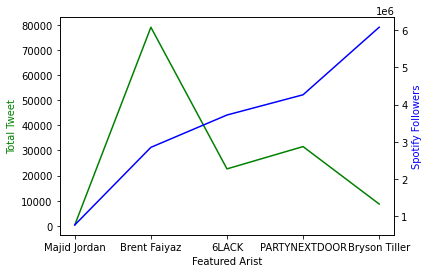

In [34]:
popular_score_related_artist = popular_score_related_artist.sort("followers")
popular_score_related_artist = popular_score_related_artist.toPandas()


x = popular_score_related_artist['name']
y1 = popular_score_related_artist['total_tweet']
y2 = popular_score_related_artist['followers']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Total Tweet', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()

### Graph : Tweet Trend Vs Spotify Followers

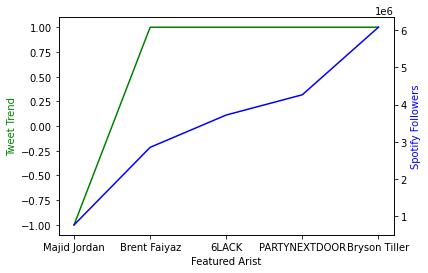

In [35]:
x = popular_score_related_artist['name']
y1 = popular_score_related_artist['trend']
y2 = popular_score_related_artist['followers']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Tweet Trend', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()

# Business Questions - IV

### A. What are the top 5 songs per featured artists?
### B. Has any of those top songs been in the top charts for 2022? For how many weeks?
### C. From the charts find the song name which has been in the maximum in the top charts!

Showing Any Top 5 Song for Artist : OneRepublic


+--------------+
|name          |
+--------------+
|Lose Somebody |
|Apologize     |
|Good Life     |
|Run           |
|Counting Stars|
+--------------+
only showing top 5 rows

Showing Song for Artist : OneRepublic on the Charts Week sorted by Week on Chart


+---------------+------+--------------------+------------+--------------+
|     track_name|energy|           artist_id|artist_names|weeks_on_chart|
+---------------+------+--------------------+------------+--------------+
|I Ain't Worried| 0.797|5Pwc4xIPtQLFEnJri...| OneRepublic|            10|
+---------------+------+--------------------+------------+--------------+

Song which has been in the maximum in the top charts is : I Ain't Worried with 10 week(s) on Charts 


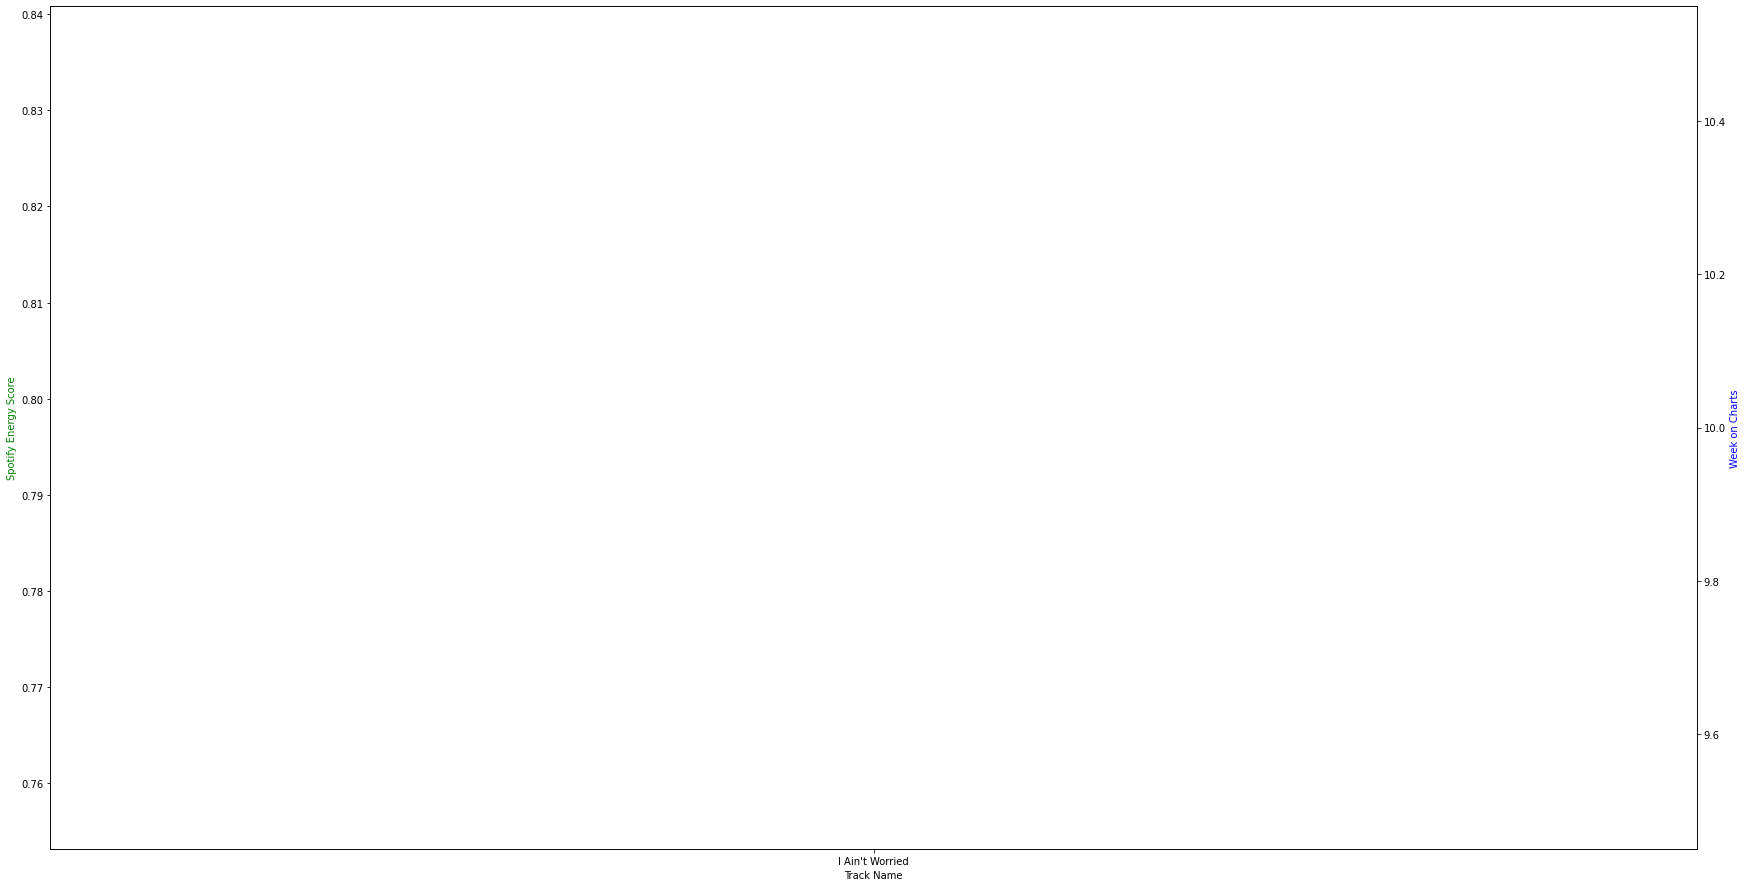

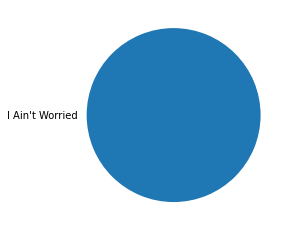

Showing Any Top 5 Song for Artist : Harry Styles
+------------------+
|name              |
+------------------+
|Adore You         |
|Late Night Talking|
|As It Was         |
|Little Freak      |
|Daylight          |
+------------------+
only showing top 5 rows

Showing Song for Artist : Harry Styles on the Charts Week sorted by Week on Chart


+--------------------+------+--------------------+------------+--------------+
|          track_name|energy|           artist_id|artist_names|weeks_on_chart|
+--------------------+------+--------------------+------------+--------------+
|        Little Freak| 0.535|6KImCVD70vtIoJWnq...|Harry Styles|             2|
|            Daylight| 0.445|6KImCVD70vtIoJWnq...|Harry Styles|             2|
|Music For a Sushi...| 0.715|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|             Matilda| 0.294|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|  Late Night Talking| 0.728|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|           As It Was| 0.731|6KImCVD70vtIoJWnq...|Harry Styles|            19|
|   Sign of the Times| 0.595|6KImCVD70vtIoJWnq...|Harry Styles|            39|
|             Falling| 0.267|6KImCVD70vtIoJWnq...|Harry Styles|            81|
|           Adore You| 0.771|6KImCVD70vtIoJWnq...|Harry Styles|           104|
|    Watermelon Sugar| 0.816|6KImCVD70vtIoJWnq...|Ha

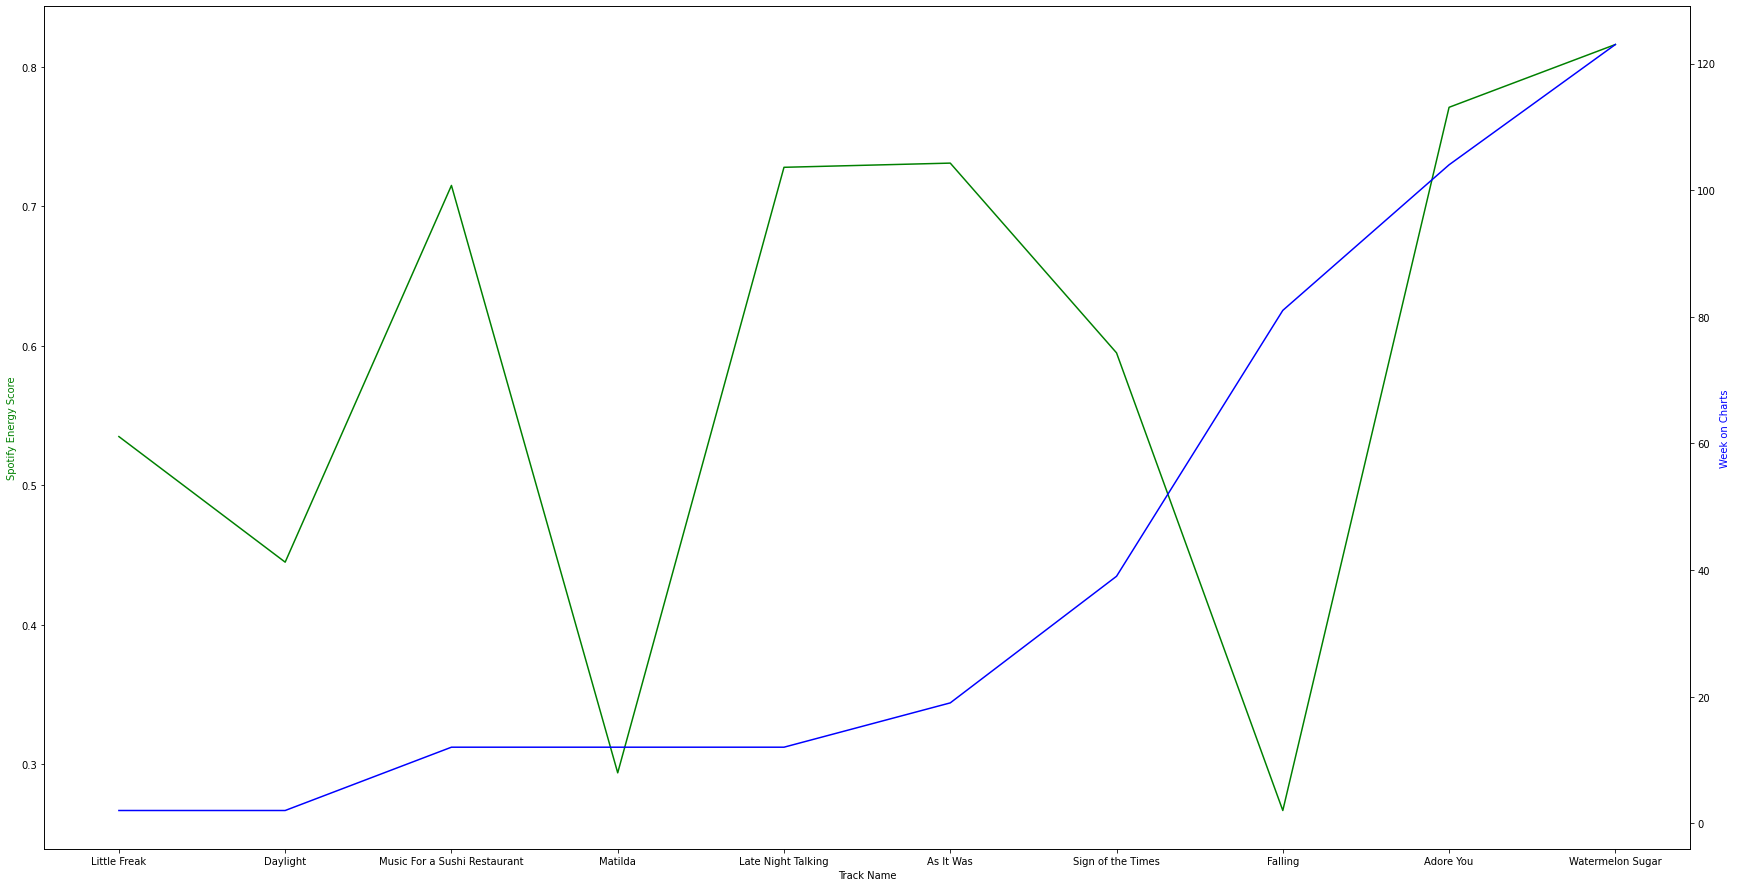

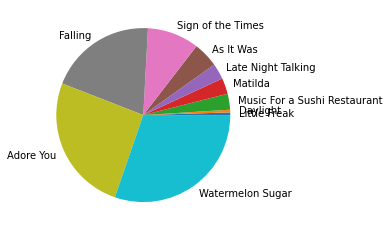

Showing Any Top 5 Song for Artist : The Weeknd
+-----------------+
|name             |
+-----------------+
|Blinding Lights  |
|Starboy          |
|Call Out My Name |
|I Was Never There|
|The Hills        |
+-----------------+
only showing top 5 rows

Showing Song for Artist : The Weeknd on the Charts Week sorted by Week on Chart


+--------------------+------+--------------------+--------------------+--------------+
|          track_name|energy|           artist_id|        artist_names|weeks_on_chart|
+--------------------+------+--------------------+--------------------+--------------+
|   I Was Never There| 0.737|1Xyo4u8uXC1ZmMpat...|The Weeknd, Gesaf...|            10|
|Lost in the Fire ...| 0.671|1Xyo4u8uXC1ZmMpat...|Gesaffelstein, Th...|            21|
|         Die For You| 0.525|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            26|
|           You Right| 0.621|1Xyo4u8uXC1ZmMpat...|Doja Cat, The Weeknd|            39|
|    Call Out My Name| 0.593|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            42|
|Save Your Tears (...| 0.825|1Xyo4u8uXC1ZmMpat...|The Weeknd, Arian...|            48|
|           The Hills| 0.564|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            50|
|     Save Your Tears| 0.826|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            68|
|             Starboy| 0.587|1Xyo4u8uXC1ZmM

Song which has been in the maximum in the top charts is : Blinding Lights with 121 week(s) on Charts 


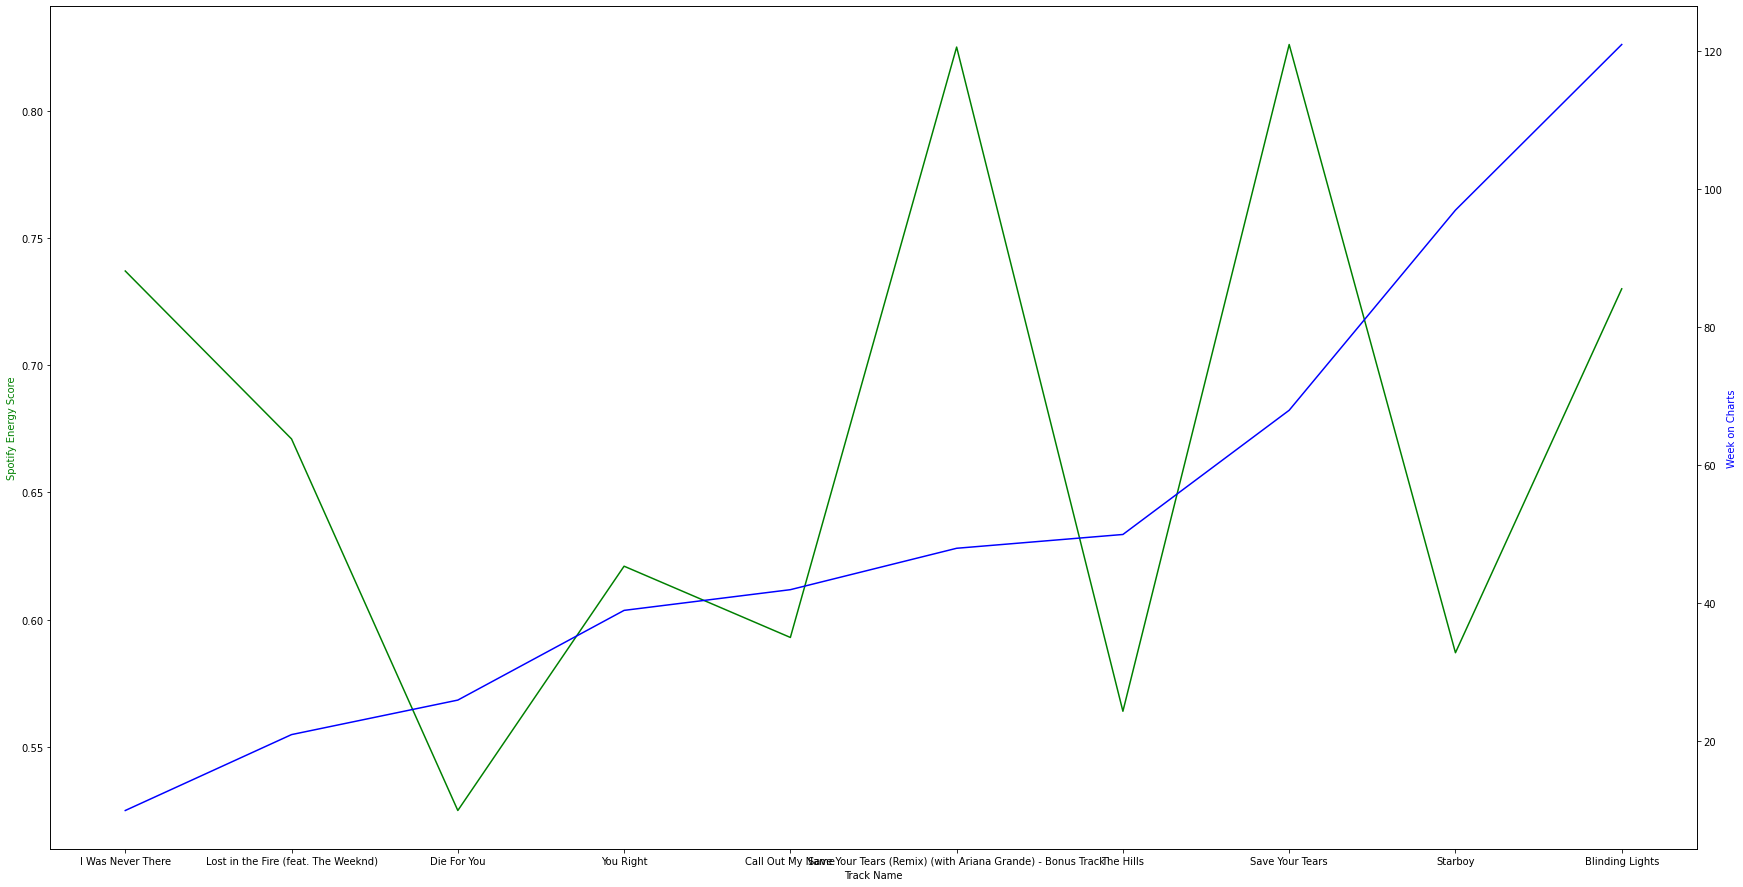

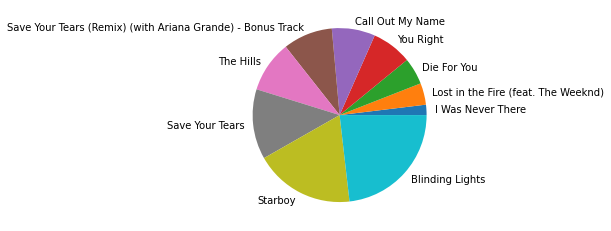

Showing Any Top 5 Song for Artist : John Legend
+---------------------------+
|name                       |
+---------------------------+
|Tacones Rojos              |
|Wild (feat. Gary Clark Jr.)|
|Nervous                    |
|Ordinary People            |
|All of Me                  |
+---------------------------+
only showing top 5 rows

Showing Song for Artist : John Legend on the Charts Week sorted by Week on Chart


+----------+------+--------------------+------------+--------------+
|track_name|energy|           artist_id|artist_names|weeks_on_chart|
+----------+------+--------------------+------------+--------------+
| All of Me| 0.264|5y2Xq6xcjJb2jVM54...| John Legend|           145|
+----------+------+--------------------+------------+--------------+

Song which has been in the maximum in the top charts is : All of Me with 145 week(s) on Charts 


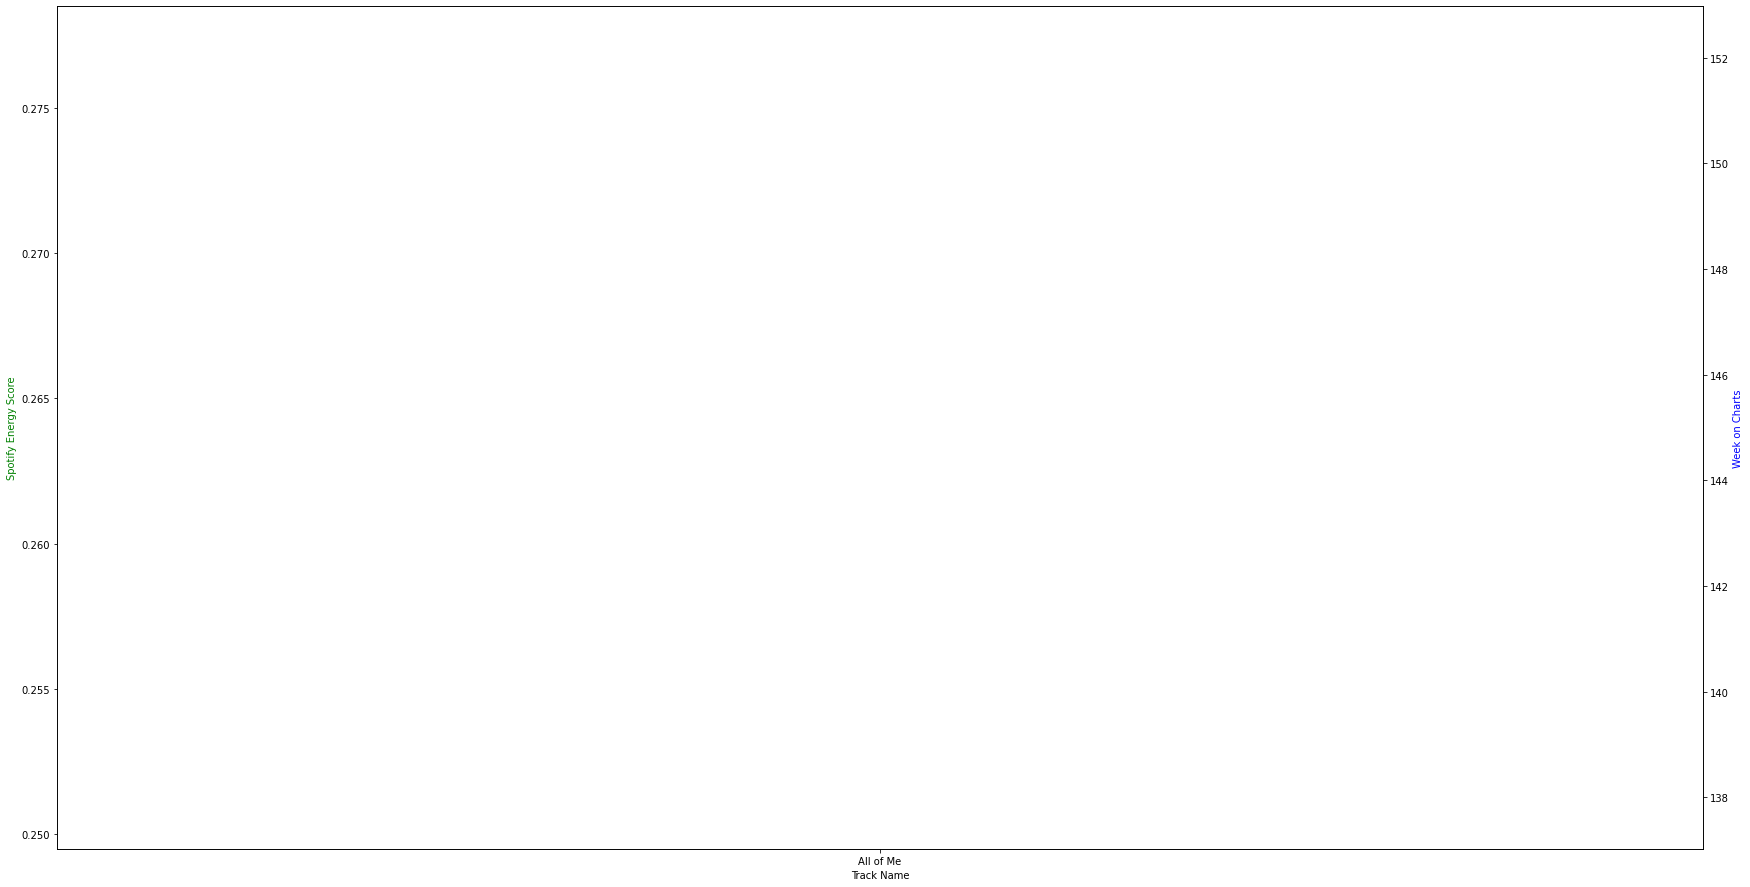

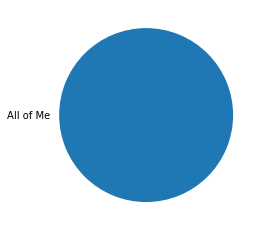

Showing Any Top 5 Song for Artist : Bad Bunny
+----------------+
|name            |
+----------------+
|Party           |
|Me Porto Bonito |
|LA CANCIÓN      |
|Tarot           |
|Tití Me Preguntó|
+----------------+
only showing top 5 rows

Showing Song for Artist : Bad Bunny on the Charts Week sorted by Week on Chart
+----------------+------+--------------------+--------------------+--------------+
|      track_name|energy|           artist_id|        artist_names|weeks_on_chart|
+----------------+------+--------------------+--------------------+--------------+
|        Neverita| 0.498|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|           Tarot| 0.684|4q3ewBCX7sLwd24eu...|Bad Bunny, Jhay C...|            14|
|          Efecto| 0.475|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|Tití Me Preguntó| 0.715|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|           Party| 0.799|4q3ewBCX7sLwd24eu...|Bad Bunny, Rauw A...|            14|
|   Ojitos Lind

Song which has been in the maximum in the top charts is : LA CANCIÓN with 64 week(s) on Charts 


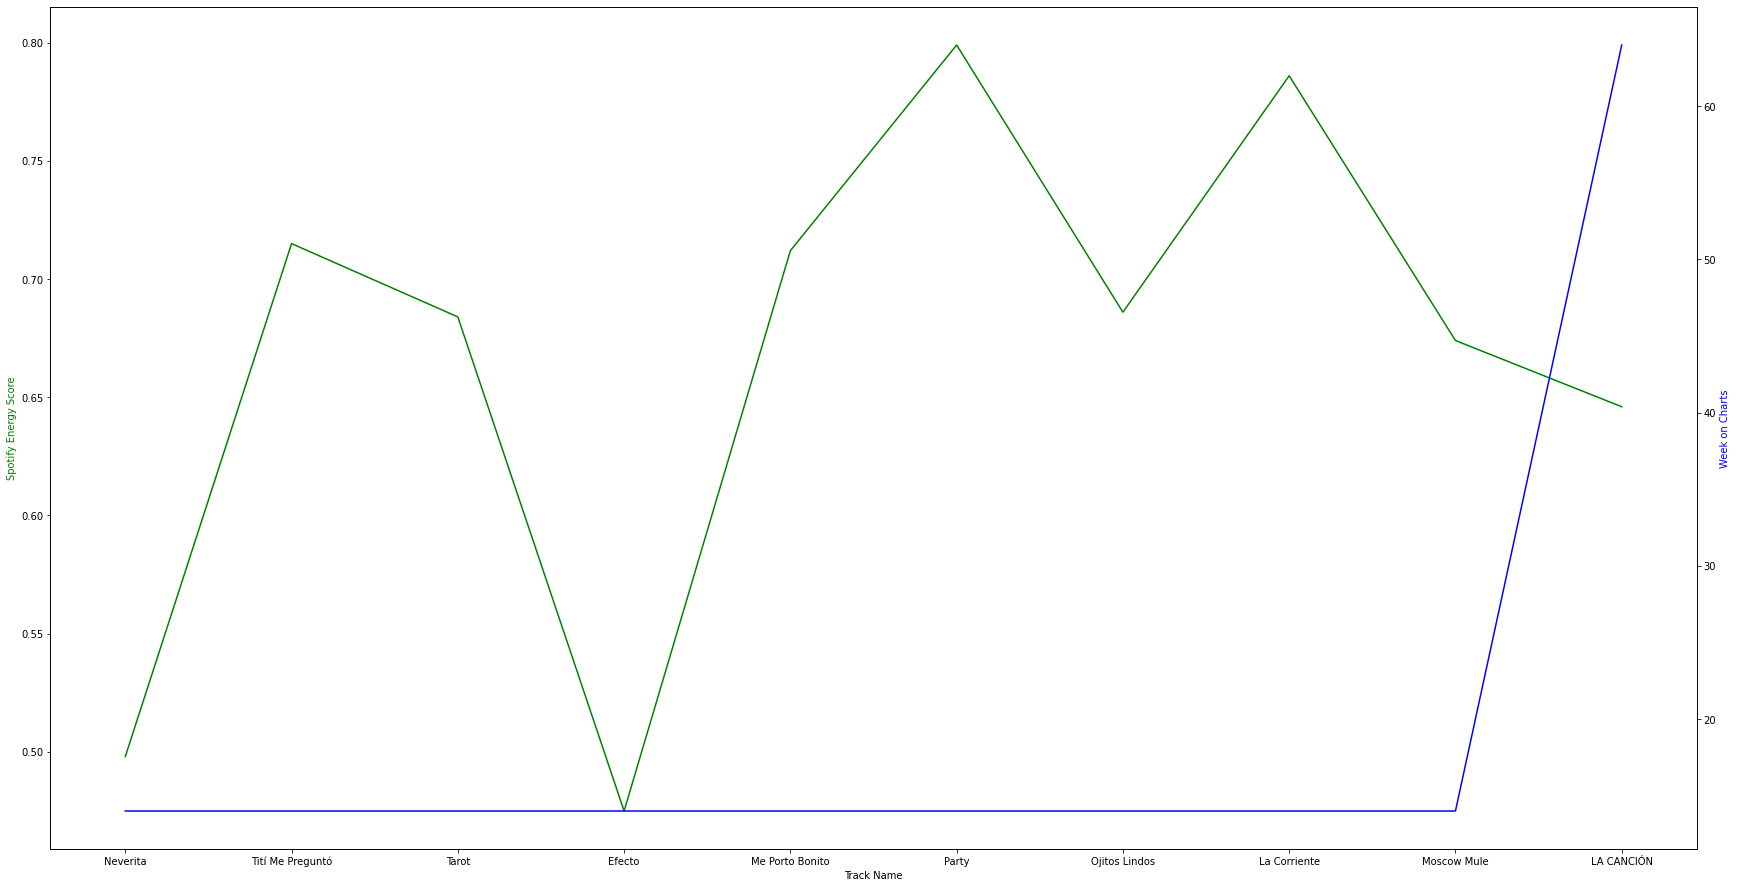

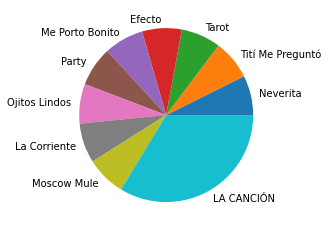

In [36]:
# Clean up top-chart Song Id - spotify:track:02MWAaffLxlfxAUY7c5dvx -->  02MWAaffLxlfxAUY7c5dvx
spotify_top_charts_22_cleaned = spotify_top_charts_22.withColumn("uri", split(spotify_top_charts_22['uri'], ':').getItem(2))

for artist,artist_id in main_artist_dict.items():
    print(f"Showing Any Top 5 Song for Artist : {artist}")
    top_tracks = top_tracks_main_artist.filter(top_tracks_main_artist["artist_id"]==artist_id)
    top_tracks.select("name").show(5, truncate=False)
    
    print(f"Showing Song for Artist : {artist} on the Charts Week sorted by Week on Chart")
    song_on_the_chart = top_tracks.join(spotify_top_charts_22_cleaned,top_tracks.id ==  spotify_top_charts_22_cleaned.uri,"inner")
    song_on_the_chart = song_on_the_chart.select(["track_name", "energy","artist_id", "artist_names", "weeks_on_chart"]).sort("weeks_on_chart")
    song_on_the_chart.show()
    
    print(f"Song which has been in the maximum in the top charts is : {song_on_the_chart.tail(1)[0].__getitem__('track_name')} with {song_on_the_chart.tail(1)[0].__getitem__('weeks_on_chart')} week(s) on Charts ")

    song_popularity_meter = song_on_the_chart.toPandas()

    x = song_popularity_meter['track_name']
    y1 = song_popularity_meter['energy']
    y2 = song_popularity_meter['weeks_on_chart']

    fig, ax1 = plt.subplots()
    fig.set_size_inches(29.5, 15.5)

    ax2 = ax1.twinx()

    ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')

    ax1.set_xlabel('Track Name', color = 'black')
    ax1.set_ylabel('Spotify Energy Score', color = 'g')
    ax2.set_ylabel('Week on Charts', color = 'b')
    
    plt.show()
    plt.pie(song_popularity_meter['weeks_on_chart'], labels=song_popularity_meter['track_name'])

    plt.show()

# Spark Machine Learning - K-Means Cluster


***K-Means Clustering is an unsupervised learning algorithm*** that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

In terms of our business case, we are going to leverage Kmeans to identify additional songs for our featured artist to play based on acoustic features of historical songs that have been in the top charts during the last 6 years (source: Kaggle)

# Load Historical Songs

In [37]:
historical_songs_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/HistoricalTracks.csv")            
            .distinct())

historical_songs_df = historical_songs_df.withColumn("Uri", split(historical_songs_df['uri'], '/').getItem(4))

In [38]:
# Create A feature Vector
from pyspark.ml.feature import VectorAssembler

feature_columns = ["acoustics", "danceability", "instrumentalness", "energy"  ,"speechiness"]

assembler = VectorAssembler(inputCols=feature_columns,outputCol='featureVector')
historical_songs_df = assembler.transform(historical_songs_df)
historical_songs_df.show()

+-------+--------------------+----------+--------------------+--------------------+------------+------------------+----------------+--------+--------------------+------------+------------+---------------+------------+------+----+--------+----+-----------+---------+----------------+----------+-------+-------+-----------+--------------+---------+------------------+---+--------+-----------+-----------+--------------------+--------------------+
|Country|                 Uri|Popularity|               Title|              Artist|Album/Single|             Genre|Artist_followers|Explicit|               Album|Release_date|Track_number|Tracks_in_album|danceability|energy| key|loudness|mode|speechiness|acoustics|instrumentalness|liveliness|valence|  tempo|duration_ms|time_signature|Genre_new|Days_since_release|USA|Popu_max|Top10_dummy|Top50_dummy|             Cluster|       featureVector|
+-------+--------------------+----------+--------------------+--------------------+------------+--------------

## Prepare a Feature dataframe to train the model

In [39]:
X = historical_songs_df.select(["acoustics", "danceability", "instrumentalness", "energy"  ,"speechiness", "featureVector"])
X.show()

+---------+------------+----------------+------+-----------+--------------------+
|acoustics|danceability|instrumentalness|energy|speechiness|       featureVector|
+---------+------------+----------------+------+-----------+--------------------+
|    0.278|       0.694|         1.34E-6| 0.758|      0.218|[0.278,0.694,1.34...|
|  0.00948|       0.769|         6.65E-5| 0.829|     0.0661|[0.00948,0.769,6....|
|  0.00988|       0.448|             0.0| 0.435|      0.039|[0.00988,0.448,0....|
|    0.984|       0.742|         5.78E-5| 0.432|     0.0615|[0.984,0.742,5.78...|
|    0.653|       0.735|           0.918| 0.525|     0.0441|[0.653,0.735,0.91...|
|    0.337|       0.706|             0.0| 0.485|      0.331|[0.337,0.706,0.0,...|
|   0.0847|       0.841|             0.0| 0.728|     0.0484|[0.0847,0.841,0.0...|
|    0.275|       0.558|             0.0| 0.566|     0.0243|[0.275,0.558,0.0,...|
|  0.00483|       0.516|         0.00895| 0.518|       0.04|[0.00483,0.516,0....|
|    0.183|     

## Find out the best K value in K-Means by plotting different K Values

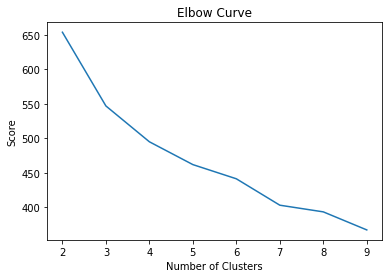

In [40]:
from pyspark.ml.clustering import KMeans

import numpy as np
import pandas as pd

cost = np.zeros(10)

for k in range(2,10):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('featureVector')
    model = kmeans.fit(X)
    cost[k] = model.summary.trainingCost

# Plot the cost
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8, 9]
df_cost.insert(0, 'cluster', new_col)

import pylab as pl
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [41]:
# Ideal K size is K = 5
# Since the song list is huge, take K = 20
kmeans = KMeans().setK(20)

kmeans.setSeed(1).setFeaturesCol('featureVector')
model = kmeans.fit(X)
model.setPredictionCol("cluster")

transformed = model.transform(historical_songs_df)
transformed.select(["Title","Artist","cluster"]).show(truncate=False)

+-----------------------------------+--------------------------------------------+-------+
|Title                              |Artist                                      |cluster|
+-----------------------------------+--------------------------------------------+-------+
|loco contigo                       |DJ Snake - J Balvin - Tyga                  |0      |
|perfect                            |Logic                                       |10     |
|spirit - from disneys the lion king|BeyoncÃ©                                    |9      |
|amorfoda                           |Bad Bunny                                   |15     |
|whoa                               |XXXTENTACION                                |1      |
|who dat boy                        |Tyler, The Creator - A$AP Rocky             |2      |
|goosebumps                         |Travis Scott                                |10     |
|christmas time                     |Backstreet Boys                             |2      |

## Create a Method to pull song in the same cluster, displayed by highest popularity

In [42]:
def print_similar_songs(query,display=5):
    query = query.lower()
    found_cluster = None
    try:
        found_cluster = transformed.filter(transformed['Title']==query).select(["cluster"]).head(1)[0].__getitem__('cluster')
    except:
        print("Song do not exists in Database for Suggestion")
        return
    
    print(f"Found on Cluster {found_cluster}")
    related_song = transformed.filter(transformed['cluster']==found_cluster).select(["Title", "Popularity", "Uri"])
    related_song = related_song.withColumn("Title", initcap(col('Title'))).withColumn("Title", initcap(col('Title'))).withColumnRenamed("Uri", "Link")
    related_song = related_song.withColumn("Link", concat(lit("https://open.spotify.com/track/"),col('Link')))
    related_song = related_song.orderBy(desc("Popularity")).take(display)
    for song in related_song:
            print(f"{song['Title']} - Listen @ {song['Link']} - Popularity {song['Popularity']}")
    

## Enter the Song Name to get related Songs Suggestion

## Related Song Suggestion for the Main Artist's Song which has been on the Top Charts

In [44]:
for artist,artist_id in main_artist_dict.items():
    top_tracks = top_tracks_main_artist.filter(top_tracks_main_artist["artist_id"]==artist_id)
    song_on_the_chart = top_tracks.join(spotify_top_charts_22_cleaned,top_tracks.id ==  spotify_top_charts_22_cleaned.uri,"inner")
    song_on_the_chart = song_on_the_chart.select(["track_name", "energy","artist_id", "artist_names", "weeks_on_chart"]).sort("weeks_on_chart")
    print(f"\nSong which has been in the maximum in the top charts is for - {artist} is : {song_on_the_chart.tail(1)[0].__getitem__('track_name')}")
    if song_on_the_chart.tail(1)[0].__getitem__('track_name'):
        print_similar_songs(song_on_the_chart.tail(1)[0].__getitem__('track_name'))


Song which has been in the maximum in the top charts is for - OneRepublic is : I Ain't Worried


Song do not exists in Database for Suggestion

Song which has been in the maximum in the top charts is for - Harry Styles is : Watermelon Sugar
Found on Cluster 16
Blinding Lights - Listen @ https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b - Popularity 57327.4
Watermelon Sugar - Listen @ https://open.spotify.com/track/6UelLqGlWMcVH1E5c4H7lY - Popularity 53686.25
Thunder - Listen @ https://open.spotify.com/track/0tKcYR2II1VCQWT79i5NrW - Popularity 40887.35
Nice For What - Listen @ https://open.spotify.com/track/1cTZMwcBJT0Ka3UJPXOeeN - Popularity 34945.7
Nice For What - Listen @ https://open.spotify.com/track/3CA9pLiwRIGtUBiMjbZmRw - Popularity 27828.8

Song which has been in the maximum in the top charts is for - The Weeknd is : Blinding Lights


Found on Cluster 16


Blinding Lights - Listen @ https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b - Popularity 57327.4
Watermelon Sugar - Listen @ https://open.spotify.com/track/6UelLqGlWMcVH1E5c4H7lY - Popularity 53686.25
Thunder - Listen @ https://open.spotify.com/track/0tKcYR2II1VCQWT79i5NrW - Popularity 40887.35
Nice For What - Listen @ https://open.spotify.com/track/1cTZMwcBJT0Ka3UJPXOeeN - Popularity 34945.7
Nice For What - Listen @ https://open.spotify.com/track/3CA9pLiwRIGtUBiMjbZmRw - Popularity 27828.8



Song which has been in the maximum in the top charts is for - John Legend is : All of Me
Found on Cluster 3


Lovely - Listen @ https://open.spotify.com/track/0u2P5u6lvoDfwTYjAADbn4 - Popularity 79693.9
When The Partys Over - Listen @ https://open.spotify.com/track/43zdsphuZLzwA9k4DJhU0I - Popularity 57236.95
When The Partys Over - Listen @ https://open.spotify.com/track/14JzyD6FlBD5z0wV5P07YI - Popularity 26340.3
I Love You - Listen @ https://open.spotify.com/track/6CcJMwBtXByIz4zQLzFkKc - Popularity 18010.15
Its Beginning To Look A Lot Like Christmas - Listen @ https://open.spotify.com/track/0lLdorYw7lVrJydTINhWdI - Popularity 13829.1

Song which has been in the maximum in the top charts is for - Bad Bunny is : LA CANCIÓN


Song do not exists in Database for Suggestion


# Artist Feature Collaboration Network Using Graphframes

Our last analysis will leverage graphframes in order to confirm and/or identyfy new artists that can open our feature artist concert or in general be paired with them.

The source if this data set is Kaggle and contains artist data for ~20k artists whose songs made it to the Spotify weekly charts and ~136k additional artists who had at least one feature with at least one of the chart artists.


In [58]:
historical_features = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/edges.csv"))

artist_allup = (spark.read
                  .option("header","true")
                  .option("inferSchema","true") 
                  .csv("spotify/artist_info.csv"))

In [65]:
from pyspark.sql.functions import col
from pyspark.sql.functions import count,avg,desc,asc,col
from graphframes import GraphFrame

#create vertices dataframe with just one column based on all distinct Origin airports.
vertices = artist_allup.withColumnRenamed("spotify_id","id")

#create edges dataframe with

collaborations = historical_features.withColumnRenamed("id_0", "src").withColumnRenamed("id_1", "dst").withColumnRenamed("followers", "follow")

edge = (collaborations.groupBy("src","dst")
             .agg(avg("follow").alias("pop_avg")
              )) 
# Creates the graph
graph = GraphFrame(vertices, edges)

# graph processing requires recursive/iterative calculations so is a good practice to cache
graph.cache()

GraphFrame(v:[id: string, name: string ... 4 more fields], e:[src: string, dst: string ... 4 more fields])

In [ ]:
# Create a Main Artist Dict
#main_artist_dict = {"OneRepublic":"5Pwc4xIPtQLFEnJriah9YJ", "Harry Styles":"6KImCVD70vtIoJWnq6nGn3", "The Weeknd":"1Xyo4u8uXC1ZmMpatF05PJ", "John Legend":"5y2Xq6xcjJb2jVM54GHK3t" ,"Bad Bunny":"4q3ewBCX7sLwd24euuV69X"}

## Top 10 Collaborators

In [73]:
outDeg = graph.outDegrees
outDeg.join(graph.vertices,"id").orderBy(desc("outDegree"),asc("id")).limit(10).toPandas()

,id,outDegree,name,followers,popularity,genres,chart_hits
0,1U5zgr455OGyIkLNXvDdrf,1112,Traditional,49046.0,59.0,"['puirt-a-beul', 'sleep']","['au (1)', 'at (1)', 'hu (1)', 'nz (1)', 'se (1)']"
1,0f1IECbrVV952unZkzrsg2,769,Mc Gw,1448741.0,66.0,"['funk carioca', 'funk mtg', 'funk ostentacao', 'funk paulista']","['br (3)', 'py (1)']"
2,0SfsnGyD8FpIN4U4WCkBZ5,485,Armin van Buuren,4094260.0,74.0,"['dutch trance', 'edm', 'pop dance', 'progressive house', 'trance']","['us (1)', 'gb (2)', 'ar (4)', 'au (2)', 'at (3)', 'be (8)', 'bo (1)', 'br (1)', 'ca (2)', 'cl (1)', 'co (2)', 'cr (1)', 'cy (1)', 'cz (2)', 'dk (2)', 'ec (1)', 'sv (1)', 'ee (4)', 'fi (4)', 'fr (3)', 'de (4)', 'gr (3)', 'gt (1)', 'hk (2)', 'hu (2)', 'in (1)', 'ie (2)', 'il (1)', 'it (2)', 'lv (4)', 'lt (3)', 'lu (1)', 'my (2)', 'mt (2)', 'mx (3)', 'nl (20)', 'nz (1)', 'no (7)', 'py (1)', 'pe (1)', 'ph (1)', 'pl (3)', 'pt (3)', 'ro (3)', 'sg (2)', 'sk (1)', 'es (1)', 'se (6)', 'ch (3)', 'tw (5)', 'tr (2)', 'uy (1)']"
3,5aIqB5nVVvmFsvSdExz408,460,Johann Sebastian Bach,3701532.0,75.0,"['baroque', 'classical', 'early music', 'german baroque']","['at (1)', 'de (1)', 'gr (1)', 'hu (1)', 'nl (1)', 'pt (1)', 'tr (1)']"
4,13y7CgLHjMVRMDqxdx0Xdo,438,Gucci Mane,4454550.0,77.0,"['atl hip hop', 'dirty south rap', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']","['us (34)', 'gb (3)', 'au (3)', 'at (2)', 'be (2)', 'br (1)', 'bg (18)', 'ca (17)', 'cr (1)', 'cy (3)', 'cz (2)', 'dk (4)', 'do (1)', 'sv (1)', 'ee (4)', 'fi (2)', 'fr (2)', 'de (2)', 'gr (12)', 'gt (1)', 'hn (1)', 'hk (2)', 'hu (4)', 'is (5)', 'id (1)', 'ie (2)', 'il (1)', 'it (1)', 'jp (2)', 'lv (5)', 'lt (4)', 'lu (5)', 'my (1)', 'mt (4)', 'mx (1)', 'nl (2)', 'nz (3)', 'ni (1)', 'no (4)', 'pa (1)', 'ph (1)', 'pl (2)', 'pt (2)', 'ro (8)', 'sg (1)', 'sk (5)', 'se (3)', 'ch (4)', 'tw (2)', 'th (2)', 'tr (1)', 'vn (1)']"
5,1Cs0zKBU1kc0i8ypK3B9ai,384,David Guetta,24692289.0,88.0,"['big room', 'dance pop', 'edm', 'pop', 'pop dance']","['us (16)', 'gb (26)', 'ar (21)', 'au (22)', 'at (29)', 'be (30)', 'bo (16)', 'br (19)', 'bg (24)', 'ca (23)', 'cl (16)', 'co (18)', 'cr (13)', 'cy (19)', 'cz (26)', 'dk (25)', 'do (12)', 'ec (15)', 'eg (2)', 'sv (16)', 'ee (30)', 'fi (43)', 'fr (37)', 'de (40)', 'gr (22)', 'gt (14)', 'hn (13)', 'hk (20)', 'hu (29)', 'is (13)', 'in (1)', 'id (9)', 'ie (26)', 'il (8)', 'it (25)', 'jp (5)', 'lv (25)', 'lt (28)', 'lu (31)', 'my (20)', 'mt (21)', 'mx (21)', 'ma (2)', 'nl (24)', 'nz (19)', 'ni (10)', 'no (41)', 'pa (17)', 'py (15)', 'pe (17)', 'ph (17)', 'pl (24)', 'pt (20)', 'ro (10)', 'sa (2)', 'sg (21)', 'sk (25)', 'za (2)', 'kr (3)', 'es (24)', 'se (33)', 'ch (39)', 'tw (24)', 'th (7)', 'tr (16)', 'ua (1)', 'ae (3)', 'uy (18)', 'vn (8)', 'ad (2)']"
6,1mYsTxnqsietFxj1OgoGbG,360,A.R. Rahman,23828027.0,79.0,"['desi pop', 'filmi', 'modern bollywood']","['in (24)', 'my (3)']"
7,0TnOYISbd1XYRBk9myaseg,326,Pitbull,9555658.0,82.0,"['dance pop', 'miami hip hop', 'pop', 'pop rap']","['us (7)', 'gb (7)', 'ar (20)', 'au (7)', 'at (10)', 'be (9)', 'bo (17)', 'br (8)', 'bg (8)', 'ca (8)', 'cl (16)', 'co (15)', 'cr (12)', 'cy (2)', 'cz (7)', 'dk (8)', 'do (11)', 'ec (21)', 'sv (18)', 'ee (10)', 'fi (13)', 'fr (7)', 'de (11)', 'gr (8)', 'gt (20)', 'hn (15)', 'hk (7)', 'hu (10)', 'is (8)', 'id (2)', 'ie (8)', 'it (11)', 'lv (10)', 'lt (10)', 'lu (6)', 'my (12)', 'mt (9)', 'mx (20)', 'nl (11)', 'nz (7)', 'ni (13)', 'no (13)', 'pa (21)', 'py (13)', 'pe (17)', 'ph (6)', 'pl (7)', 'pt (12)', 'sg (9)', 'sk (10)', 'es (21)', 'se (8)', 'ch (10)', 'tw (13)', 'tr (6)', 'uy (18)', 'ad (1)']"
8,2o5jDhtHVPhrJdv3cEQ99Z,294,Tiësto,6497410.0,82.0,"['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'house', 'pop', 'pop dance', 'slap house', 'trance', 'tropical house']","['us (10)', 'gb (10)', 'ar (6)', 'au (9)', 'at (13)', 'be (11)', 'bo (7)', 'br (6)', 'bg (12)', 'ca (13)', 'cl (7)', 'co (6)', 'cr (6)', 'cy (6)', 'cz (12)', 'dk (13)', 'do (5)', 'ec (6)', 'eg (3)', 'sv (4)', 'ee (16)', 'fi (17)', 'f

## Which are the relevant most artists in terms of collaboration?

In [70]:
rank = graph.pageRank(resetProbability=0.15, maxIter=10)

In [78]:
rank.vertices.orderBy(desc("pagerank")).limit(10).toPandas()

,id,name,followers,popularity,genres,chart_hits,pagerank
0,5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,3701532.0,75.0,"['baroque', 'classical', 'early music', 'german baroque']","['at (1)', 'de (1)', 'gr (1)', 'hu (1)', 'nl (1)', 'pt (1)', 'tr (1)']",530.284409
1,7hJcb9fa4alzcOq3EaNPoG,Snoop Dogg,8686870.0,84.0,"['g funk', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'west coast rap']","['us (4)', 'gb (2)', 'at (1)', 'be (2)', 'br (2)', 'bg (1)', 'ca (4)', 'cl (1)', 'co (1)', 'cr (1)', 'cz (1)', 'dk (3)', 'ec (1)', 'sv (1)', 'ee (1)', 'fr (4)', 'de (1)', 'gr (1)', 'hk (1)', 'hu (1)', 'it (2)', 'lv (1)', 'lt (1)', 'my (2)', 'mt (1)', 'mx (1)', 'nl (3)', 'nz (1)', 'ni (1)', 'py (1)', 'pe (1)', 'ph (2)', 'pl (2)', 'pt (1)', 'ro (1)', 'sg (1)', 'sk (1)', 'kr (1)', 'se (3)', 'ch (2)', 'tw (1)', 'tr (1)']",296.772825
2,7jzR5qj8vFnSu5JHaXgFEr,Jean Sibelius,194098.0,56.0,"['classical', 'finnish classical', 'impressionism', 'post-romantic era']",['fi (3)'],236.890461
3,77AiFEVeAVj2ORpC85QVJs,Steve Aoki,3689746.0,74.0,"['dance pop', 'edm', 'electro house', 'pop dance', 'pop rap', 'tropical house']","['us (5)', 'gb (2)', 'ar (4)', 'au (2)', 'at (3)', 'be (5)', 'bo (3)', 'br (7)', 'bg (3)', 'ca (5)', 'cl (3)', 'co (1)', 'cr (2)', 'cy (3)', 'cz (6)', 'dk (3)', 'do (1)', 'ec (4)', 'sv (3)', 'ee (7)', 'fi (4)', 'fr (1)', 'de (3)', 'gr (3)', 'gt (2)', 'hn (2)', 'hk (4)', 'hu (7)', 'is (1)', 'in (2)', 'id (4)', 'ie (3)', 'il (1)', 'it (5)', 'jp (2)', 'lv (5)', 'lt (9)', 'lu (4)', 'my (4)', 'mt (5)', 'mx (3)', 'nl (1)', 'nz (2)', 'ni (2)', 'no (7)', 'pa (2)', 'py (2)', 'pe (5)', 'ph (5)', 'pl (5)', 'pt (7)', 'ro (3)', 'sa (4)', 'sg (5)', 'sk (5)', 'kr (1)', 'es (4)', 'se (4)', 'ch (3)', 'tw (12)', 'th (2)', 'tr (4)', 'ae (1)', 'uy (2)', 'vn (3)']",153.389489
4,6ugw7JCu0AG7txRcRAxU8d,Mc Rd,60700.0,62.0,"['funk carioca', 'funk mtg', 'rave funk']","['ee (1)', 'lt (1)', 'sa (1)', 'ua (1)']",130.666985
5,7wU2WGCJ8HxkekHHE2QLul,Fuego,253571.0,67.0,"['latin hip hop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'trap latino']","['ar (3)', 'bo (2)', 'cl (2)', 'co (3)', 'cr (2)', 'do (4)', 'ec (3)', 'sv (2)', 'fr (1)', 'gt (2)', 'hn (2)', 'it (1)', 'lu (1)', 'mx (1)', 'ni (2)', 'pa (3)', 'py (2)', 'pe (2)', 'es (6)', 'uy (4)']",122.895948
6,7xNYY1Zkb1vks5m9ATlJok,Naza,1142363.0,64.0,"['francoton', 'french hip hop', 'pop urbaine']","['be (3)', 'fr (37)', 'lu (2)', 'ma (2)', 'ch (1)']",122.879758
7,6yTYR09WCvsgdnurDW4WQo,DJ Antoine,527585.0,62.0,"['dance pop', 'pop dance', 'pop rap', 'tropical house']","['at (7)', 'de (9)', 'sk (1)', 'ch (3)']",120.092748
8,5vzETUgvElb2xfKJ1e0VHN,הכוכב הבא,24901.0,48.0,[],['il (1)'],119.603619
9,7f5Zgnp2spUuuzKplmRkt7,Lost Frequencies,2479248.0,77.0,"['belgian edm', 'edm', 'pop', 'pop dance', 'tropical house']","['us (1)', 'gb (4)', 'ar (4)', 'au (5)', 'at (13)', 'be (20)', 'bo (3)', 'br (3)', 'bg (5)', 'ca (4)', 'cl (3)', 'co (4)', 'cr (3)', 'cy (4)', 'cz (8)', 'dk (6)', 'do (3)', 'ec (3)', 'sv (3)', 'ee (11)', 'fi (10)', 'fr (8)', 'de (15)', 'gr (5)', 'gt (3)', 'hn (3)', 'hk (3)', 'hu (9)', 'is (3)', 'ie (5)', 'il (1)', 'it (6)', 'lv (9)', 'lt (10)', 'lu (11)', 'my (2)', 'mt (6)', 'mx (4)', 'ma (1)', 'nl (12)', 'nz (4)', 'ni (3)', 'no (13)', 'pa (3)', 'py (3)', 'pe (3)', 'ph (2)', 'pl (9)', 'pt (4)', 'ro (4)', 'sa (1)', 'sg (3)', 'sk (7)', 'za (1)', 'kr (1)', 'es (6)', 'se (9)', 'ch (12)', 'tw (4)', 'tr (2)', 'ua (1)', 'ae (1)', 'uy (3)', 'vn (2)']",117.688603


## Analysing The Weeknd Collaborations

In [79]:
#Creating a subgraph for the Weeknd and listing all collaborations

subgraph = GraphFrame(graph.vertices,graph.edges.filter("src= '1Xyo4u8uXC1ZmMpatF05PJ'"))
subgraph.edges.toPandas()

,src,name_0,dst,name_1,follow,popularity
0,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,50co4Is1HCEo8bhOyUWKpn,Young Thug,56843448,88.5
1,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,30DhU7BDmF4PH0JVhu8ZRg,Sabrina Claudio,50812242,78
2,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,57LYzLEk2LcFghVwuWbcuS,Summer Walker,53440096,86
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,6vXTefBL93Dj5IqAWq6OTv,French Montana,54036160,84.5
4,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,3hteYQFiMFbJY7wS0xDymP,Gesaffelstein,49837691,84
5,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,2feDdbD5araYcm6JhFHHw7,Labrinth,51886419,86
6,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,55Aa2cqylxrFIXC767Z865,Lil Wayne,61975713,89
7,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,23fqKkggKUBHNkbKtXEls4,Kygo,57522783,86.5
8,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,5gCRApTajqwbnHHPbr2Fpi,Juicy J,52279280,83
9,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,20sxb77xiYeusSH8cVdatc,Meek Mill,55869412,84


In [80]:
# Quantity of Collaborations
subgraph.edges.count()


56

In [81]:
ranks = subgraph.pageRank(resetProbability=0.15, maxIter=10)

In [85]:
ranks.vertices.orderBy(desc("pagerank")).limit(1).toPandas()

,id,name,followers,popularity,genres,chart_hits,pagerank
0,4tOVIRjlWWfR1RrAxyRqTE,Chromatics,385030.0,53.0,"['alternative dance', 'art pop', 'chillwave', 'dream pop', 'electronica', 'electropop', 'modern dream pop', 'neo-synthpop', 'new rave']",None,1.015173


In [89]:
# What is the shortest between TheWeeknd and Harry Styles? -> There's not seem to be any relationship

paths = graph.bfs("id = '1Xyo4u8uXC1ZmMpatF05PJ'", "id = '6KImCVD70vtIoJWnq6nGn3'")

paths.toPandas()

,id,name,followers,popularity,genres,chart_hits


In [90]:
# What is the shortest path between TheWeeknd and John Legend? -> There are a few 

paths = graph.bfs("id = '1Xyo4u8uXC1ZmMpatF05PJ'", "id = '5y2Xq6xcjJb2jVM54GHK3t'")

paths.toPandas()

,from,e0,v1,e1,to
0,"(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 49387909.0, 93.0, ['canadian contemporary r&b', 'canadian pop', 'pop'], ['us (81)', 'gb (74)', 'ar (23)', 'au (76)', 'at (61)', 'be (68)', 'bo (46)', 'br (41)', 'bg (83)', 'ca (83)', 'cl (29)', 'co (39)', 'cr (46)', 'cy (62)', 'cz (65)', 'dk (76)', 'do (62)', 'ec (36)', 'eg (38)', 'sv (42)', 'ee (78)', 'fi (68)', 'fr (66)', 'de (64)', 'gr (76)', 'gt (44)', 'hn (56)', 'hk (61)', 'hu (71)', 'is (77)', 'in (22)', 'id (26)', 'ie (74)', 'il (34)', 'it (54)', 'jp (12)', 'lv (71)', 'lt (75)', 'lu (64)', 'my (69)', 'mt (54)', 'mx (48)', 'ma (36)', 'nl (71)', 'nz (73)', 'ni (43)', 'no (78)', 'pa (61)', 'py (18)', 'pe (25)', 'ph (38)', 'pl (67)', 'pt (74)', 'ro (48)', 'ru (13)', 'sa (38)', 'sg (69)', 'sk (76)', 'za (38)', 'kr (24)', 'es (32)', 'se (75)', 'ch (74)', 'tw (47)', 'th (28)', 'tr (53)', 'ua (16)', 'ae (43)', 'uy (26)', 'vn (30)', 'ad (5)'])","(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 1sBkRIssrMs1AbVkOJbc7a, Rick Ross, 55608532, 85)","(1sBkRIssrMs1AbVkOJbc7a, Rick Ross, 6220623.0, 77.0, ['dirty south rap', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap'], ['us (4)', 'gb (1)', 'au (1)', 'be (1)', 'bg (2)', 'ca (2)', 'cy (1)', 'ee (1)', 'gr (1)', 'ie (1)', 'lv (1)', 'lt (1)', 'lu (1)', 'mt (1)', 'ma (1)', 'nl (1)', 'nz (1)', 'no (1)', 'pt (1)', 'ro (1)', 'za (7)', 'ch (1)', 'ae (1)'])","(1sBkRIssrMs1AbVkOJbc7a, Rick Ross, 5y2Xq6xcjJb2jVM54GHK3t, John Legend, 12480980, 77)","(5y2Xq6xcjJb2jVM54GHK3t, John Legend, 6260357.0, 77.0, ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary'], ['us (3)', 'gb (5)', 'ar (2)', 'au (3)', 'at (6)', 'be (4)', 'bo (3)', 'br (3)', 'bg (5)', 'ca (5)', 'cl (2)', 'co (3)', 'cr (3)', 'cy (4)', 'cz (5)', 'dk (8)', 'do (3)', 'ec (3)', 'sv (3)', 'ee (5)', 'fi (3)', 'fr (3)', 'de (5)', 'gr (5)', 'gt (3)', 'hn (3)', 'hk (5)', 'hu (6)', 'is (3)', 'in (1)', 'id (4)', 'ie (6)', 'il (1)', 'it (4)', 'lv (5)', 'lt (5)', 'lu (6)', 'my (4)', 'mt (5)', 'mx (2)', 'nl (8)', 'nz (3)', 'ni (2)', 'no (8)', 'pa (3)', 'py (3)', 'pe (2)', 'ph (3)', 'pl (4)', 'pt (5)', 'ro (1)', 'sg (4)', 'sk (5)', 'za (2)', 'es (4)', 'se (8)', 'ch (5)', 'tw (6)', 'th (2)', 'tr (4)', 'ae (1)', 'uy (2)', 'vn (3)'])"
1,"(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 49387909.0, 93.0, ['canadian contemporary r&b', 'canadian pop', 'pop'], ['us (81)', 'gb (74)', 'ar (23)', 'au (76)', 'at (61)', 'be (68)', 'bo (46)', 'br (41)', 'bg (83)', 'ca (83)', 'cl (29)', 'co (39)', 'cr (46)', 'cy (62)', 'cz (65)', 'dk (76)', 'do (62)', 'ec (36)', 'eg (38)', 'sv (42)', 'ee (78)', 'fi (68)', 'fr (66)', 'de (64)', 'gr (76)', 'gt (44)', 'hn (56)', 'hk (61)', 'hu (71)', 'is (77)', 'in (22)', 'id (26)', 'ie (74)', 'il (34)', 'it (54)', 'jp (12)', 'lv (71)', 'lt (75)', 'lu (64)', 'my (69)', 'mt (54)', 'mx (48)', 'ma (36)', 'nl (71)', 'nz (73)', 'ni (43)', 'no (78)', 'pa (61)', 'py (18)', 'pe (25)', 'ph (38)', 'pl (67)', 'pt (74)', 'ro (48)', 'ru (13)', 'sa (38)', 'sg (69)', 'sk (76)', 'za (38)', 'kr (24)', 'es (32)', 'se (75)', 'ch (74)', 'tw (47)', 'th (28)', 'tr (53)', 'ua (16)', 'ae (43)', 'uy (26)', 'vn (30)', 'ad (5)'])","(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 20sxb77xiYeusSH8cVdatc, Meek Mill, 55869412, 84)","(20sxb77xiYeusSH8cVdatc, Meek Mill, 6481503.0, 75.0, ['hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap'], ['us (52)', 'gb (8)', 'au (4)', 'at (2)', 'be (3)', 'bo (1)', 'br (1)', 'bg (4)', 'ca (36)', 'co (1)', 'cr (2)', 'cy (3)', 'cz (2)', 'dk (2)', 'do (2)', 'sv (1)', 'ee (2)', 'fi (2)', 'fr (2)', 'de (2)', 'gr (6)', 'gt (1)', 'hn (1)', 'hk (2)', 'hu (2)', 'is (2)', 'ie (2)', 'il (1)', 'it (1)', 'lv (2)', 'lt (3)', 'lu (4)', 'my (3)', 'mt (2)', 'ma (1)', 'nl (3)', 'nz (5)', 'no (2)', 'pa (2)', 'py (1)', 'ph (3)', 'pl (4)', 'pt (2)', 'ro (3)', 'sa (1)', 'sg (3)', 'sk (2)', 'za (3)', 'es (1)', 'se (2)', 'ch (5)', 'tw (3)', 'th (1)', 'tr (2)', 'ae (1)', 'uy (1)', 'vn (1)'])","(20sxb77xiYeusSH8cVdatc, Meek Mill, 5y2Xq6xcjJb2jVM54GHK3t, John Legend, 12741

In [92]:
# What is the shortest path between TheWeeknd and OneRepublic? ->

paths = graph.bfs("id = '1Xyo4u8uXC1ZmMpatF05PJ'", "id = '5Pwc4xIPtQLFEnJriah9YJ'")

paths.toPandas()


,from,e0,v1,e1,to
0,"(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 49387909.0, 93.0, ['canadian contemporary r&b', 'canadian pop', 'pop'], ['us (81)', 'gb (74)', 'ar (23)', 'au (76)', 'at (61)', 'be (68)', 'bo (46)', 'br (41)', 'bg (83)', 'ca (83)', 'cl (29)', 'co (39)', 'cr (46)', 'cy (62)', 'cz (65)', 'dk (76)', 'do (62)', 'ec (36)', 'eg (38)', 'sv (42)', 'ee (78)', 'fi (68)', 'fr (66)', 'de (64)', 'gr (76)', 'gt (44)', 'hn (56)', 'hk (61)', 'hu (71)', 'is (77)', 'in (22)', 'id (26)', 'ie (74)', 'il (34)', 'it (54)', 'jp (12)', 'lv (71)', 'lt (75)', 'lu (64)', 'my (69)', 'mt (54)', 'mx (48)', 'ma (36)', 'nl (71)', 'nz (73)', 'ni (43)', 'no (78)', 'pa (61)', 'py (18)', 'pe (25)', 'ph (38)', 'pl (67)', 'pt (74)', 'ro (48)', 'ru (13)', 'sa (38)', 'sg (69)', 'sk (76)', 'za (38)', 'kr (24)', 'es (32)', 'se (75)', 'ch (74)', 'tw (47)', 'th (28)', 'tr (53)', 'ua (16)', 'ae (43)', 'uy (26)', 'vn (30)', 'ad (5)'])","(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 23fqKkggKUBHNkbKtXEls4, Kygo, 57522783, 86.5)","(23fqKkggKUBHNkbKtXEls4, Kygo, 8134874.0, 80.0, ['edm', 'pop', 'pop dance', 'tropical house'], ['us (28)', 'gb (24)', 'ar (9)', 'au (24)', 'at (35)', 'be (28)', 'bo (10)', 'br (11)', 'bg (26)', 'ca (36)', 'cl (10)', 'co (10)', 'cr (10)', 'cy (23)', 'cz (36)', 'dk (35)', 'do (10)', 'ec (10)', 'eg (4)', 'sv (10)', 'ee (36)', 'fi (37)', 'fr (21)', 'de (31)', 'gr (25)', 'gt (12)', 'hn (12)', 'hk (23)', 'hu (38)', 'is (21)', 'in (9)', 'id (21)', 'ie (31)', 'il (11)', 'it (17)', 'jp (13)', 'lv (32)', 'lt (39)', 'lu (31)', 'my (24)', 'mt (30)', 'mx (10)', 'ma (3)', 'nl (34)', 'nz (21)', 'ni (9)', 'no (64)', 'pa (13)', 'py (10)', 'pe (9)', 'ph (21)', 'pl (25)', 'pt (24)', 'ro (14)', 'sa (5)', 'sg (25)', 'sk (42)', 'za (14)', 'kr (3)', 'es (14)', 'se (46)', 'ch (44)', 'tw (31)', 'th (13)', 'tr (12)', 'ua (1)', 'ae (6)', 'uy (9)', 'vn (12)', 'ad (1)'])","(23fqKkggKUBHNkbKtXEls4, Kygo, 5Pwc4xIPtQLFEnJriah9YJ, OneRepublic, 22290157, 82)","(5Pwc4xIPtQLFEnJriah9YJ, OneRepublic, 14155283.0, 84.0, ['piano rock', 'pop', 'pop rock'], ['us (12)', 'gb (12)', 'ar (5)', 'au (13)', 'at (21)', 'be (12)', 'bo (7)', 'br (5)', 'bg (13)', 'ca (16)', 'cl (5)', 'co (5)', 'cr (5)', 'cy (10)', 'cz (19)', 'dk (10)', 'do (3)', 'ec (6)', 'eg (3)', 'sv (6)', 'ee (29)', 'fi (14)', 'fr (8)', 'de (15)', 'gr (13)', 'gt (6)', 'hn (6)', 'hk (13)', 'hu (21)', 'is (8)', 'in (2)', 'id (10)', 'ie (13)', 'il (7)', 'it (18)', 'jp (3)', 'lv (35)', 'lt (33)', 'lu (17)', 'my (17)', 'mt (17)', 'mx (7)', 'ma (2)', 'nl (10)', 'nz (15)', 'ni (5)', 'no (23)', 'pa (9)', 'py (4)', 'pe (5)', 'ph (11)', 'pl (13)', 'pt (13)', 'ro (6)', 'ru (2)', 'sa (3)', 'sg (18)', 'sk (21)', 'za (8)', 'kr (3)', 'es (9)', 'se (20)', 'ch (21)', 'tw (19)', 'th (10)', 'tr (6)', 'ua (3)', 'ae (5)', 'uy (5)', 'vn (8)'])"


In [91]:
# What is the shortest path between TheWeeknd and Bad Bunny? ->

paths = graph.bfs("id = '1Xyo4u8uXC1ZmMpatF05PJ'", "id = '4q3ewBCX7sLwd24euuV69X'")

paths.toPandas()


,from,e0,v1,e1,to
0,"(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 49387909.0, 93.0, ['canadian contemporary r&b', 'canadian pop', 'pop'], ['us (81)', 'gb (74)', 'ar (23)', 'au (76)', 'at (61)', 'be (68)', 'bo (46)', 'br (41)', 'bg (83)', 'ca (83)', 'cl (29)', 'co (39)', 'cr (46)', 'cy (62)', 'cz (65)', 'dk (76)', 'do (62)', 'ec (36)', 'eg (38)', 'sv (42)', 'ee (78)', 'fi (68)', 'fr (66)', 'de (64)', 'gr (76)', 'gt (44)', 'hn (56)', 'hk (61)', 'hu (71)', 'is (77)', 'in (22)', 'id (26)', 'ie (74)', 'il (34)', 'it (54)', 'jp (12)', 'lv (71)', 'lt (75)', 'lu (64)', 'my (69)', 'mt (54)', 'mx (48)', 'ma (36)', 'nl (71)', 'nz (73)', 'ni (43)', 'no (78)', 'pa (61)', 'py (18)', 'pe (25)', 'ph (38)', 'pl (67)', 'pt (74)', 'ro (48)', 'ru (13)', 'sa (38)', 'sg (69)', 'sk (76)', 'za (38)', 'kr (24)', 'es (32)', 'se (75)', 'ch (74)', 'tw (47)', 'th (28)', 'tr (53)', 'ua (16)', 'ae (43)', 'uy (26)', 'vn (30)', 'ad (5)'])","(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 1r4hJ1h58CWwUQe3MxPuau, Maluma, 81553260, 88.5)","(1r4hJ1h58CWwUQe3MxPuau, Maluma, 32165351.0, 84.0, ['reggaeton', 'reggaeton colombiano', 'trap latino'], ['us (5)', 'gb (1)', 'ar (43)', 'au (1)', 'at (4)', 'be (5)', 'bo (59)', 'br (4)', 'bg (12)', 'ca (4)', 'cl (43)', 'co (67)', 'cr (35)', 'cy (4)', 'cz (2)', 'dk (1)', 'do (35)', 'ec (58)', 'eg (1)', 'sv (46)', 'ee (3)', 'fi (1)', 'fr (3)', 'de (4)', 'gr (5)', 'gt (48)', 'hn (46)', 'hk (2)', 'hu (5)', 'is (1)', 'in (1)', 'ie (1)', 'il (6)', 'it (8)', 'jp (3)', 'lv (2)', 'lt (7)', 'lu (11)', 'my (1)', 'mt (7)', 'mx (38)', 'ma (4)', 'nl (3)', 'nz (1)', 'ni (32)', 'no (1)', 'pa (44)', 'py (42)', 'pe (57)', 'ph (1)', 'pl (1)', 'pt (11)', 'ro (9)', 'sa (1)', 'sg (2)', 'sk (6)', 'za (1)', 'es (38)', 'se (4)', 'ch (11)', 'tw (5)', 'th (2)', 'ua (1)', 'ae (2)', 'uy (45)', 'ad (5)'])","(1r4hJ1h58CWwUQe3MxPuau, Maluma, 4q3ewBCX7sLwd24euuV69X, Bad Bunny, 87834738, 92)","(4q3ewBCX7sLwd24euuV69X, Bad Bunny, 55669387.0, 100.0, ['reggaeton', 'trap latino'], ['us (76)', 'gb (1)', 'ar (91)', 'au (2)', 'at (5)', 'be (9)', 'bo (97)', 'br (1)', 'bg (5)', 'ca (15)', 'cl (106)', 'co (98)', 'cr (96)', 'cy (11)', 'cz (2)', 'dk (4)', 'do (110)', 'ec (97)', 'eg (3)', 'sv (102)', 'ee (6)', 'fi (5)', 'fr (6)', 'de (7)', 'gr (6)', 'gt (104)', 'hn (106)', 'hk (6)', 'hu (6)', 'is (4)', 'in (4)', 'id (1)', 'ie (4)', 'il (6)', 'it (15)', 'jp (2)', 'lv (6)', 'lt (11)', 'lu (19)', 'my (4)', 'mt (21)', 'mx (92)', 'ma (5)', 'nl (5)', 'nz (1)', 'ni (105)', 'no (5)', 'pa (107)', 'py (105)', 'pe (101)', 'ph (2)', 'pl (1)', 'pt (19)', 'ro (5)', 'ru (1)', 'sa (4)', 'sg (4)', 'sk (5)', 'za (2)', 'kr (4)', 'es (101)', 'se (5)', 'ch (27)', 'tw (8)', 'th (2)', 'tr (1)', 'ua (2)', 'ae (11)', 'uy (95)', 'vn (1)', 'ad (16)'])"
1,"(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 49387909.0, 93.0, ['canadian contemporary r&b', 'canadian pop', 'pop'], ['us (81)', 'gb (74)', 'ar (23)', 'au (76)', 'at (61)', 'be (68)', 'bo (46)', 'br (41)', 'bg (83)', 'ca (83)', 'cl (29)', 'co (39)', 'cr (46)', 'cy (62)', 'cz (65)', 'dk (76)', 'do (62)', 'ec (36)', 'eg (38)', 'sv (42)', 'ee (78)', 'fi (68)', 'fr (66)', 'de (64)', 'gr (76)', 'gt (44)', 'hn (56)', 'hk (61)', 'hu (71)', 'is (77)', 'in (22)', 'id (26)', 'ie (74)', 'il (34)', 'it (54)', 'jp (12)', 'lv (71)', 'lt (75)', 'lu (64)', 'my (69)', 'mt (54)', 'mx (48)', 'ma (36)', 'nl (71)', 'nz (73)', 'ni (43)', 'no (78)', 'pa (61)', 'py (18)', 'pe (25)', 'ph (38)', 'pl (67)', 'pt (74)', 'ro (48)', 'ru (13)', 'sa (38)', 'sg (69)', 'sk (76)', 'za (38)', 'kr (24)', 'es (32)', 'se (75)', 'ch (74)', 'tw (47)', 'th (28)', 'tr (53)', 'ua (16)', 'ae (43)', 'uy (26)', 'vn (30)', 'ad (5)'])","(1Xyo4u8uXC1ZmMpatF05PJ, The Weeknd, 3TVXtAsR1Inumwj472S9r4, Drake, 116240445, 94)","(3TVXtAsR1Inumwj472S9r4, Drake, 66852536.0, 95.0, ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap'], ['us (190)', 'gb (163)', 'ar (18)', 'au (148)', 'at (97)', 'be (99)', 'bo (22)', 'br (31)', 'bg (125)', 'ca (179)', 'cl (20)', 'co (24)', 'cr (52)', 'cy (105)', 'cz (55)', 'dk (132)', 'do

# Store the results in MariaDB

We're going to store the results of the clustering in a MariaDB database (previously created) to let analysts use their BI tools of choice and visualize insights (rather than force them to use the notebook, which is something they don't like that much).
These are the "coordinates" to connect to our MariaDB instance:

In [ ]:
url = "jdbc:mysql://localhost:3306/iris"
table = "Iris"
mode = "overwrite"
props = {"user":"osbdet",
         "password":"osbdet123$", 
         "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.functions import vector_to_array

mariadb_pred = predictions.select(col("Id").alias("id"), \
                                  (vector_to_array(col('pca_features'))[0]).alias('pca_feature_x'), \
                                  (vector_to_array(col('pca_features'))[1]).alias('pca_feature_y'), \
                                  col("prediction"))
mariadb_pred.printSchema()

In [ ]:
mariadb_pred.write.jdbc(url,table,mode,props)